In [36]:
# visualization
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns

# utils
import pandas as pd
import numpy as np
import warnings;warnings.filterwarnings('ignore')

### 데이터 불러오기

In [37]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [38]:
df_train.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

### 시군구 데이터 살펴보기

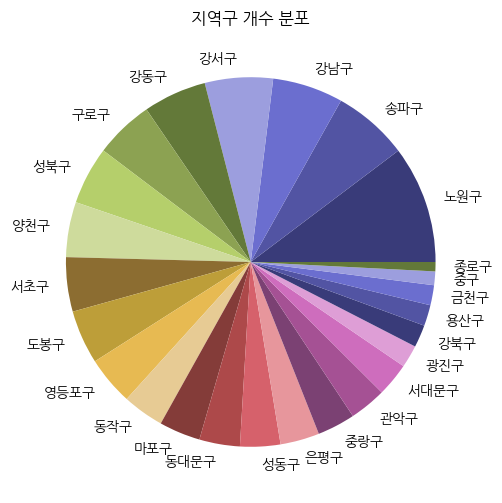

In [39]:
# 1. 군 추출
group_set = set()
for location in df_train['시군구'].unique():
    group = location.split()[1]
    group_set.add(group)
# print(group_set)
    
# 2. 군 데이터 분포를 circle plot으로 살펴보기
plt.figure(figsize=(8, 6))
group_counts = df_train['시군구'].str.split().str[1].value_counts()
# print(group_counts)

ratio = group_counts / df_train['시군구'].shape[0] * 100

color1 = plt.cm.tab20b
cmap = [color1(i) if i < 20 else color1(i - 20) for i in range(len(group_counts))]

plt.pie(ratio, labels=group_counts.index, autopct='',colors=cmap)
plt.title('지역구 개수 분포')
plt.show()

,시군구,target
0,강남구,124000
1,강남구,123500
2,강남구,91500
3,강남구,130000
4,강남구,117000
...,...,...
1118817,은평구,20000
1118818,은평구,20000
1118819,은평구,28000
1118820,은평구,29000


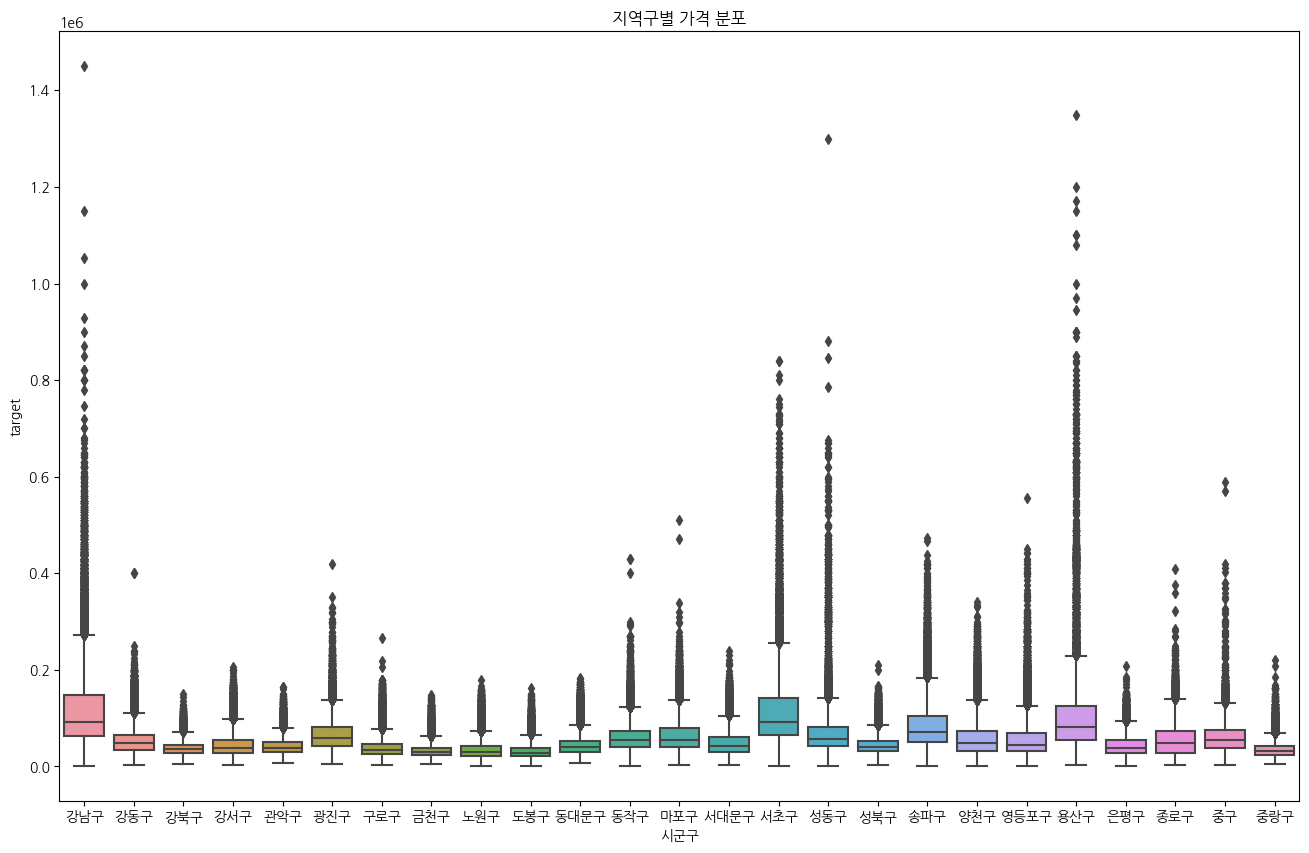

In [40]:
# 3. 각 구에 따른 target 분포를 살펴보기
temp = pd.concat([df_train['시군구'].str.split().str[1], df_train['target']], axis=1)
display(temp)

plt.figure(figsize=(16, 10))
sns.boxplot(x=temp['시군구'], y=temp['target'])
plt.title('지역구별 가격 분포')
plt.show()


### 번지, 본번 - 부번

번지는 본번-부번으로 이루어져있다.

In [41]:
df_train['번지']

0          658-1
1          658-1
2          658-1
3          658-1
4          658-1
           ...  
1118817      382
1118818      382
1118819      382
1118820      382
1118821    11-67
Name: 번지, Length: 1118822, dtype: object

In [42]:
# 결측치 비율
missing_ratio = df_train['본번'].isna().sum() / df_train['본번'].shape[0] * 100
print(f'결측치 비율: {missing_ratio:.2f}%')

결측치 비율: 0.01%


In [43]:
df_train[df_train['번지'].isna()].loc[:,['번지', '본번', '부번', '아파트명']]

,번지,본번,부번,아파트명
56930,NaN,0.0,0.0,서초포레스타2단지
56931,NaN,0.0,0.0,서초포레스타2단지
56932,NaN,0.0,0.0,서초포레스타2단지
56933,NaN,0.0,0.0,서초포레스타2단지
56934,NaN,0.0,0.0,서초포레스타2단지
...,...,...,...,...
720188,NaN,NaN,NaN,힐스테이트 서초 젠트리스
720189,NaN,NaN,NaN,힐스테이트 서초 젠트리스
720190,NaN,NaN,NaN,힐스테이트 서초 젠트리스
720191,NaN,NaN,NaN,힐스테이트 서초 젠트리스


In [44]:
# 번지 중복이 되는지 확인하기
# 번지가 같은 경우 아파트명이 다르면 번지 중복이 가능하다고 본다.
# 첫번째 값을 샘플로 하여 확인하기
value = df_train['번지'].value_counts().index[0]
print(value)

df_train[(df_train['번지'] == '13')]['아파트명'].value_counts()

13


신내                  1396
미성                  1217
삼호3                  810
미륭                   783
당산효성타운2차             191
상림마을7단지아이파크BL1-3     174
문래해태                  58
Name: 아파트명, dtype: int64

### 아파트명

In [45]:
df_train['아파트명'].value_counts()

현대              16644
신동아             12846
한신               9074
두산               8533
주공2              7918
                ...  
송파레이크파크호반써밋Ⅱ        1
도곡하이빌               1
창동역블루핀1동            1
한강리버힐B동             1
신용산빌딩               1
Name: 아파트명, Length: 6538, dtype: int64

In [46]:
df_train[df_train['아파트명'] == '현대']

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
1244,서울특별시 강남구 개포동,172-3,172.0,3.0,현대,133.68,201710,23,2,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000
1245,서울특별시 강남구 개포동,172-3,172.0,3.0,현대,133.68,201804,26,4,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000
1283,서울특별시 강남구 개포동,177,177.0,0.0,현대,131.83,201710,11,5,1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179000
1284,서울특별시 강남구 개포동,177,177.0,0.0,현대,163.85,201711,11,7,1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202000
1285,서울특별시 강남구 개포동,177,177.0,0.0,현대,131.83,201712,30,2,1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116854,서울특별시 중랑구 면목동,1502,1502.0,0.0,현대,84.81,200708,7,7,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000
1116855,서울특별시 중랑구 면목동,1502,1502.0,0.0,현대,84.09,200708,15,10,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38500
1116856,서울특별시 중랑구 면목동,1502,1502.0,0.0,현대,84.09,200708,16,15,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38000
1116857,서울특별시 중랑구 면목동,1502,1502.0,0.0,현대,84.81,200708,27,14,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29000


In [47]:
# 결측치
print(f"아파트명 결측치 비율 : {df_train['아파트명'].isna().sum() / df_train['아파트명'].shape[0] * 100:.2f}%")

# 번지가 결측치가 아니라면 검색을 통하여 아파트명을 채워줄 수 있을 것이다.
df_train[df_train['아파트명'].isna()]

아파트명 결측치 비율 : 0.19%


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
3839,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,76.10,201710,16,5,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53900
3840,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,62.19,201802,26,6,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48500
3841,서울특별시 강남구 역삼동,828-21,828.0,21.0,NaN,58.65,201806,9,6,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55000
3842,서울특별시 강남구 역삼동,828-76,828.0,76.0,NaN,110.51,201803,19,3,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83000
18113,서울특별시 관악구 봉천동,685-103,685.0,103.0,NaN,61.67,201711,1,1,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115453,서울특별시 종로구 연건동,60-1,60.0,1.0,NaN,59.63,200701,15,1,1999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000
1115486,서울특별시 종로구 창신동,436-79,436.0,79.0,NaN,56.17,200701,19,6,1968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12300
1115639,서울특별시 중구 신당동,432-2001,432.0,2001.0,NaN,49.78,200703,13,4,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8650
1115640,서울특별시 중구 신당동,432-904,432.0,904.0,NaN,56.66,200706,22,5,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000


In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import re

In [49]:
def crawling(querys, url='https://www.epost.go.kr/search.RetrieveIntegrationNewZipCdList.comm'):
    result = dict()

    browser = webdriver.Chrome()
    browser.get(url)
    time.sleep(1)

    for query in querys:
        browser.find_element(By.XPATH, '//*[@id="keyword"]').clear()
        browser.find_element(By.XPATH, '//*[@id="keyword"]').click()
        browser.implicitly_wait(2)
    
        browser.find_element(By.XPATH, '//*[@id="keyword"]').send_keys(query)
        browser.implicitly_wait(2)

        browser.find_element(By.ID, 'btnZipSearch').click()
        browser.implicitly_wait(2)

        time.sleep(1.5)
    
        text = browser.find_element(By.XPATH, '//*[@id="body_layout"]/div/div[1]/div[2]/div/div/div/div/table/tbody/tr[1]/td[1]').text
        result[query] = text
    
    return result

In [50]:
def extract_apartment(dictionary):
    result = dict()

    for key in dictionary:
        # 0. \n을 기준으로 앞의 문자열 택하기
        first_part = dictionary[key].split('\n')[0]

        # 괄호로 이루어진 문자열에서
        # 1. (xx동, yy)패턴이라면 yy를 추출한다.
        pattern1 = re.search(r'\((.*?동), (.*?)\)', first_part)
        if pattern1:
            result[key] = pattern1.group(2)
            continue

        # 2. (yy)패턴이라면 yy를 추출한다. (단, yy는 '동'으로 끝나지 않는다.)
        pattern2 = re.search(r'\((.*?)\)', first_part)
        if pattern2:
            extracted = pattern2.group(1)
            if not extracted.endswith('동'):
                result[key] = extracted
                continue
    
    return result

In [51]:
df_temp = df_train[df_train['아파트명'].isna()]
df_temp['도로명주소'] = df_temp['시군구'] + ' ' + df_temp['번지']

# 1. 시군구 + 번지 합치기 (set)
name_set = set()
name_set.update(df_temp['도로명주소'])

In [52]:
# 2. 크롤링
buffer = crawling(list(name_set))
print(buffer)
result = extract_apartment(buffer)
print(result)

# result의 값
# 도로명주소: 아파트이름

{'서울특별시 구로구 구로동 780-50': '서울특별시 구로구 도림로12길 5-7 (구로동)\n서울특별시 구로구 구로동 780-50', '서울특별시 구로구 구로동 770-37': '서울특별시 구로구 도림로 39-1 (구로동)\n서울특별시 구로구 구로동 770-37', '서울특별시 광진구 화양동 20-3': '서울특별시 광진구 광나루로12길 5 (화양동)\n서울특별시 광진구 화양동 20-3', '서울특별시 구로구 구로동 797-38': '서울특별시 구로구 디지털로27라길 6-10 (구로동)\n서울특별시 구로구 구로동 797-38', '서울특별시 구로구 구로동 748-48': '서울특별시 구로구 도림로3길 18-35 (구로동)\n서울특별시 구로구 구로동 748-48', '서울특별시 구로구 구로동 794-13': '서울특별시 구로구 도림로10길 18-5 (구로동)\n서울특별시 구로구 구로동 794-13', '서울특별시 구로구 구로동 747-53': '서울특별시 구로구 구로동로18길 44-17 (구로동, 무성빌라)\n서울특별시 구로구 구로동 747-53 (무성빌라)', '서울특별시 구로구 구로동 807-37': '서울특별시 구로구 구로동로12길 4-14 (구로동)\n서울특별시 구로구 구로동 807-37', '서울특별시 구로구 구로동 770-29': '서울특별시 구로구 구로동로22길 92 (구로동)\n서울특별시 구로구 구로동 770-29', '서울특별시 구로구 구로동 745-69': '서울특별시 구로구 구로동로12길 16-26 (구로동)\n서울특별시 구로구 구로동 745-69', '서울특별시 구로구 구로동 740-42': '서울특별시 구로구 구로동로22길 34-9 (구로동)\n서울특별시 구로구 구로동 740-42', '서울특별시 구로구 구로동 781-12': '서울특별시 구로구 디지털로27다길 57-5 (구로동)\n서울특별시 구로구 구로동 781-12', '서울특별시 구로구 구로동 794-22': '서울특별시 구로구 도림로8길 13 (구로동)\n서울특별시 구로구 구로

In [53]:
# 3. 결측치 채우기
temp = df_train.copy()
temp['도로명주소'] = temp['시군구'] + ' ' + temp['번지']
temp

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,도로명주소
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500,서울특별시 강남구 개포동 658-1
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500,서울특별시 강남구 개포동 658-1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000,서울특별시 강남구 개포동 658-1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000,서울특별시 강남구 개포동 658-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,서울특별시 은평구 구산동 382
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000,서울특별시 은평구 구산동 382
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000,서울특별시 은평구 구산동 382
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000,서울특별시 은평구 구산동 382


In [54]:
temp['아파트명'].isna().sum()

2126

In [55]:
temp.loc[temp['아파트명'].isna(), '아파트명'] = temp.loc[temp['아파트명'].isna(), '도로명주소'].map(result)

In [56]:
temp['아파트명'].isna().sum()

# 도로명주소 지우기!

1529

### 전용면적

In [57]:
print(f"전용 면적의 결측치 비율: {df_train['전용면적(㎡)'].isna().sum() / df_train['전용면적(㎡)'].shape[0] * 100:.2f}%")


전용 면적의 결측치 비율: 0.00%


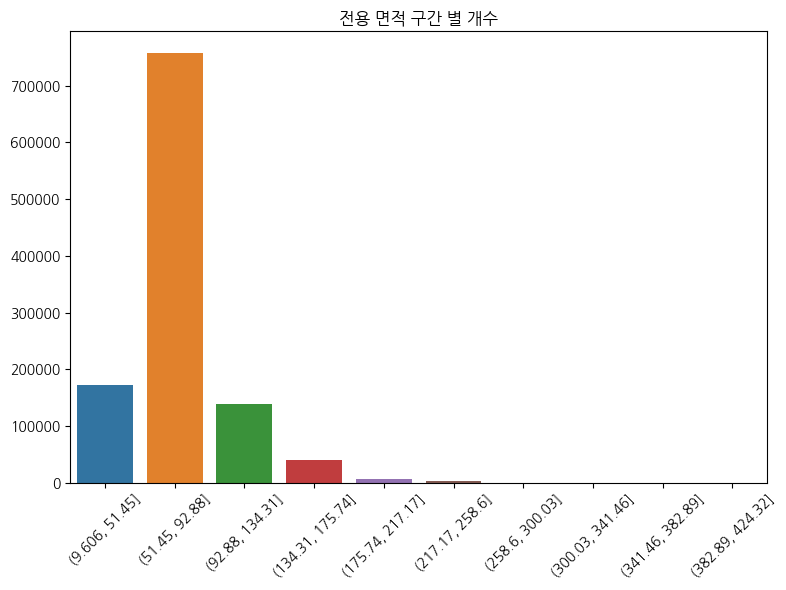

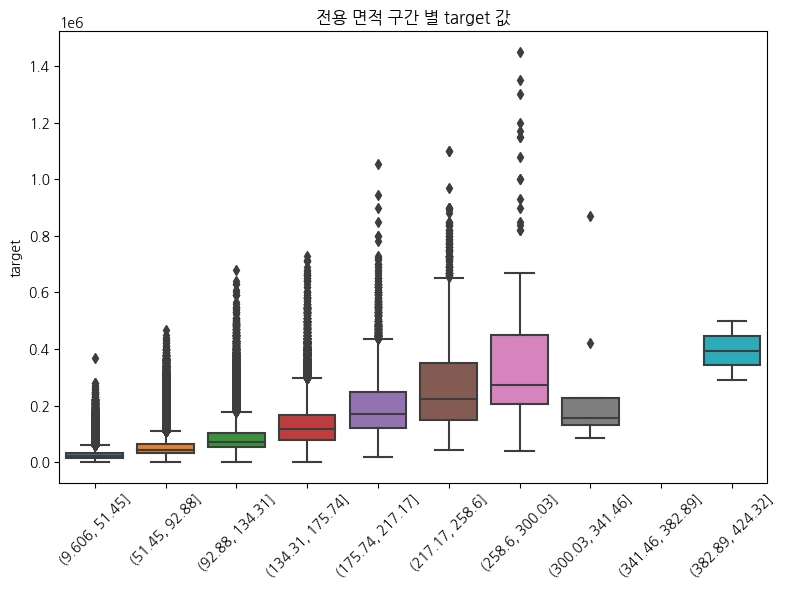

In [58]:
plt.figure(figsize=(8, 6))
# 1. 구간마다 count 세기
cut = pd.cut(df_train['전용면적(㎡)'], bins=10)
cut_counts = cut.value_counts()
sns.barplot(x=cut_counts.index, y=cut_counts.values)

plt.title('전용 면적 구간 별 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
# 2. 각 구간마다의 target value 관계 확인하기
test = df_train[['전용면적(㎡)', 'target']].copy()
test['구간'] = pd.cut(test['전용면적(㎡)'], bins=10)
sns.boxplot(x=test['구간'], y=test['target'])

plt.title('전용 면적 구간 별 target 값')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.tight_layout()
plt.show()

### 계약년월

In [59]:
# 2007년 01월부터 2023년 06월까지의 데이터
df_train['계약년월'].sort_values()

1118821    200701
1101889    200701
1101924    200701
1101925    200701
1101944    200701
            ...  
217555     202306
205473     202306
211432     202306
217621     202306
205686     202306
Name: 계약년월, Length: 1118822, dtype: int64

In [60]:
print(f"계약년월 결측치 비율: {df_train['계약년월'].isna().sum() / df_train['계약년월'].shape[0]}")

계약년월 결측치 비율: 0.0


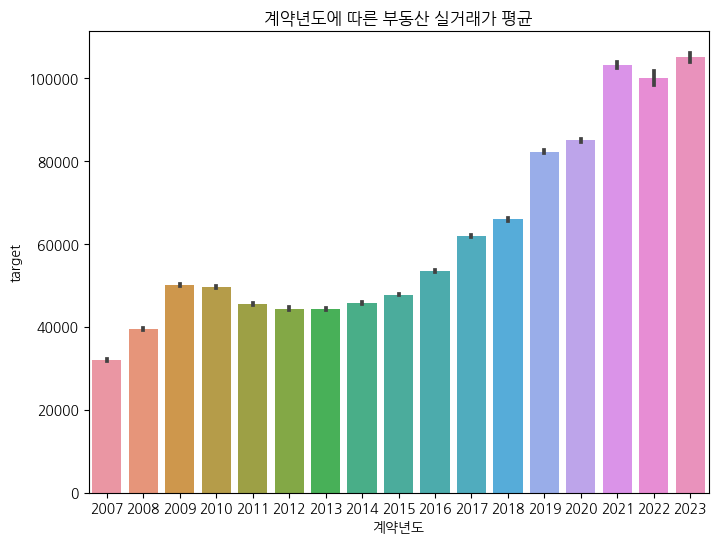

In [61]:
# 시각화
df_temp = df_train[['계약년월','target']].copy()
df_temp['계약년'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp['계약월'] = df_temp['계약년월'].astype('str').map(lambda x: x[4:])

plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['계약년'], y=df_temp['target'], order=df_temp['계약년'].sort_values().unique())
plt.xlabel('계약년도')
plt.title('계약년도에 따른 부동산 실거래가 평균')
plt.show()

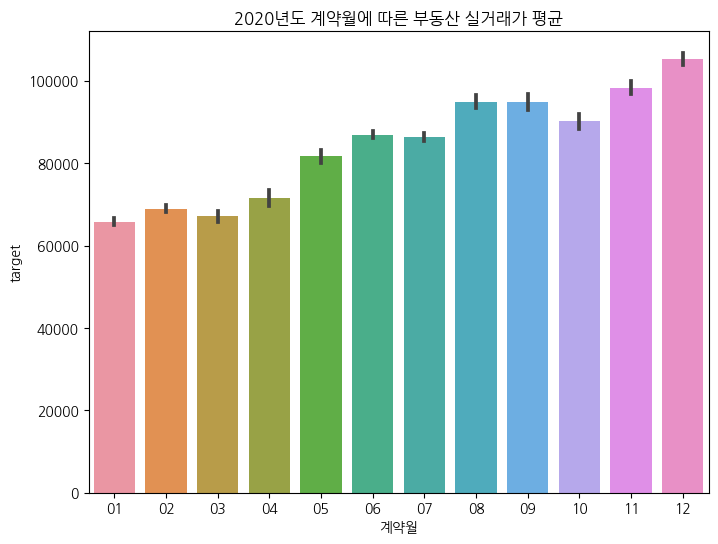

In [62]:
# 특정 년도에서의 월간 변화도 살펴보자. (2020년)
plt.figure(figsize=(8, 6))
temp = df_temp[(df_temp['계약년'] == '2020')].loc[:, ['계약월', 'target']]
sns.barplot(x=temp['계약월'], y=temp['target'], order=temp['계약월'].sort_values().unique())
plt.xlabel('계약월')
plt.title('2020년도 계약월에 따른 부동산 실거래가 평균')
plt.show()

### 계약일

In [63]:
df_train['계약일'].isna().sum()

0

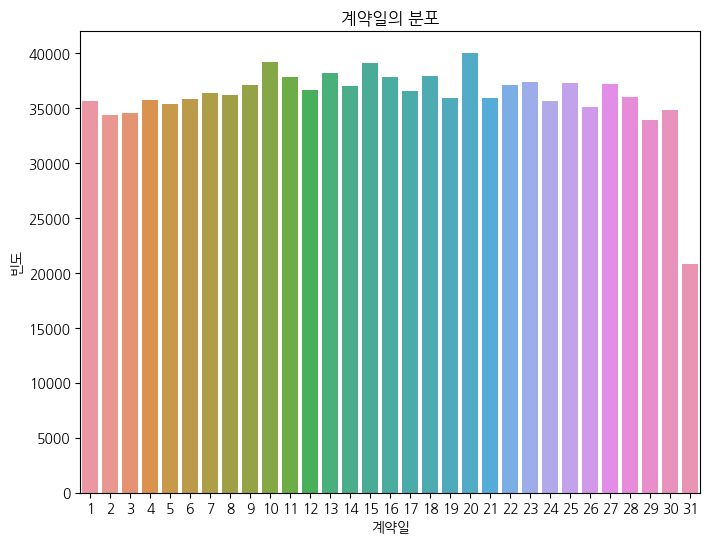

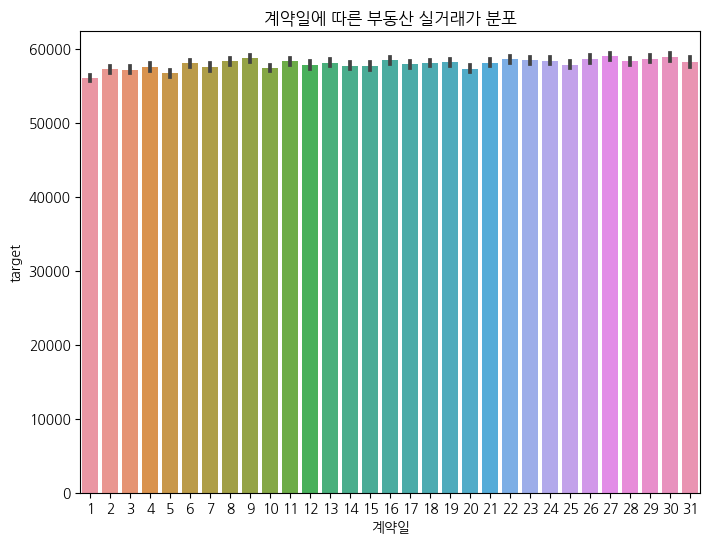

In [64]:
df_temp = df_train[['계약일', 'target']].copy()

# 계약일 분포 살펴보기
plt.figure(figsize=(8, 6))
temp = df_temp['계약일'].value_counts()
sns.barplot(x=temp.index, y=temp.values)
plt.xlabel('계약일')
plt.ylabel('빈도')
plt.title('계약일의 분포')
plt.show()

# 계약일에 따른 target 분포 살펴보기
plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['계약일'], y=df_temp['target'], order=df_temp['계약일'].sort_values().unique())
plt.xlabel('계약일')
plt.title('계약일에 따른 부동산 실거래가 분포')
plt.show()

### 층

In [65]:
df_temp = df_train[['아파트명', '건축년도','층', 'target']].copy()

df_temp['층'].isna().sum()

0

In [66]:
# 지하층이 존재한다?!
df_temp['층'].value_counts().index

Int64Index([ 5,  4,  3,  2,  6,  7,  1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, -1, 38, 39, 40, 41, 42, 43, 46, 44, 45, 47, 48, 54, 49,
            51, 50, -2, 53, 52, 58, 55, 57, 63, 59, 66, 64, -3, 62, 60, 56, 61,
            68, 67, 65, -4, 69],
           dtype='int64')

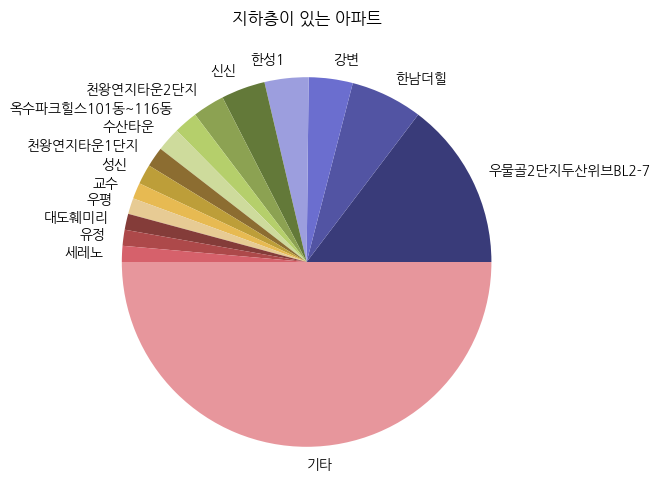

지하층이 있는 아파트 비율: 0.02%


In [67]:
# 특정 아파트에서만 나타나는지 확인해보자.
temp = df_temp[(df_temp['층'] < 0)].loc[:, '아파트명']
label = list(temp.value_counts()[:15].index) + ['기타']
ratio = list(temp.value_counts()[:15].values) + [temp.shape[0] - sum(temp.value_counts()[:9].values)]

color1 = plt.cm.tab20b
cmap = [color1(i) if i < 20 else color1(i - 20) for i in range(len(label))]

plt.figure(figsize=(8, 6))
plt.pie(ratio, labels=label, colors=cmap)
plt.title('지하층이 있는 아파트')
plt.show()

print(f"지하층이 있는 아파트 비율: {df_temp[(df_temp['층'] < 0)].shape[0] / df_temp.shape[0] * 100:.2f}%")

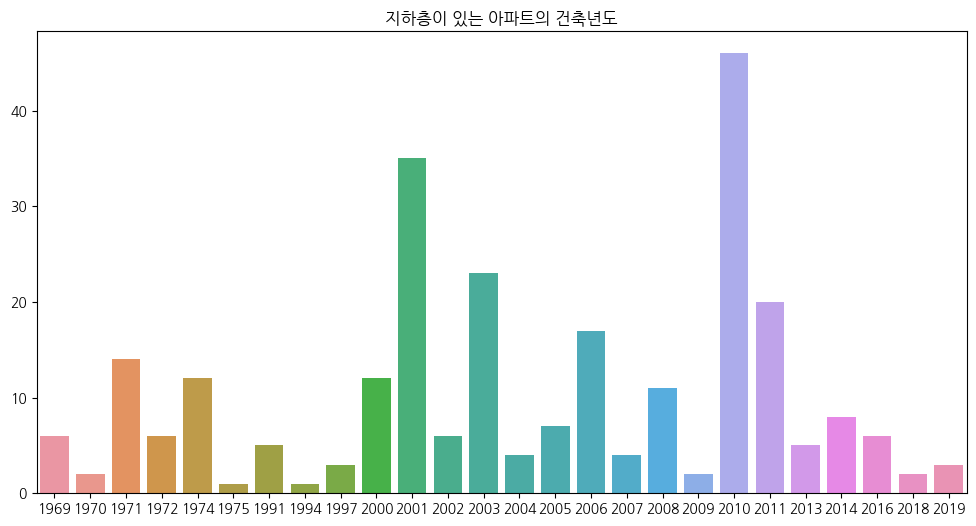

In [68]:
# 특정 연도에 지어진 아파트에서 나타나는지 확인해보자.
temp = df_temp[(df_temp['층'] < 0)].loc[:, '건축년도'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index))
plt.title('지하층이 있는 아파트의 건축년도')
plt.show()

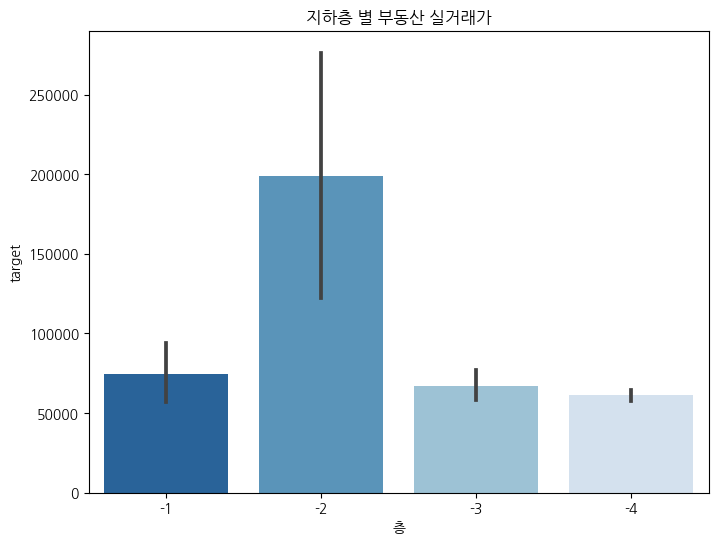

In [69]:
# 그렇다면 지하층이면 가격은 어떻게 될까? 싼 편인까? 이 그래프를 보고는 알 수 없다.
temp = df_temp[(df_temp['층'] < 0)].loc[:, ['층', 'target']]

plt.figure(figsize=(8, 6))
sns.barplot(x=temp['층'], y=temp['target'], order=sorted(temp['층'].unique(), reverse=True), palette='Blues_r')
plt.title('지하층 별 부동산 실거래가')
plt.show()

In [70]:
df_temp = df_train[['아파트명', '건축년도', '계약년월','층', 'target']].copy()
temp = df_temp[(df_temp['층'] < 0)].loc[:, ['층', '계약년월','target']]
temp['계약년'] = temp['계약년월'].astype('str').map(lambda x: x[:4])
temp.drop(['계약년월'], axis=1)

,층,target,계약년
26438,-2,56500,2018
51467,-1,44000,2018
68371,-1,25700,2018
86730,-1,44200,2018
87307,-2,600000,2018
...,...,...,...
1115746,-1,8000,2007
1115815,-1,6700,2007
1115827,-1,8200,2007
1115831,-1,15500,2007


In [71]:
unique_years = []
for floor in range(-4, 0):
    years_for_floor = temp[temp['층'] == floor]['계약년'].unique()
    unique_years.append(set(years_for_floor))

# 모든 층에 대해 공통적으로 존재하는 계약년을 찾습니다.
common_years = set.intersection(*unique_years)

print("모든 층이 존재하는 계약년:", common_years)

모든 층이 존재하는 계약년: {'2012', '2015'}


In [72]:
temp

,층,계약년월,target,계약년
26438,-2,201805,56500,2018
51467,-1,201808,44000,2018
68371,-1,201803,25700,2018
86730,-1,201801,44200,2018
87307,-2,201804,600000,2018
...,...,...,...,...
1115746,-1,200708,8000,2007
1115815,-1,200705,6700,2007
1115827,-1,200701,8200,2007
1115831,-1,200709,15500,2007


In [73]:
df_temp = df_train[['계약년월','층', 'target']].copy()
df_temp['계약년'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.drop(['계약년월'], axis=1)

,층,target,계약년
0,3,124000,2017
1,4,123500,2017
2,5,91500,2017
3,4,130000,2018
4,2,117000,2018
...,...,...,...
1118817,11,20000,2007
1118818,10,20000,2007
1118819,20,28000,2007
1118820,8,29000,2007


In [74]:
mean_value = df_temp[df_temp['계약년'] == '2015'].loc[:, ['target']].mean()
mean_value = int(mean_value)
mean_value

47739

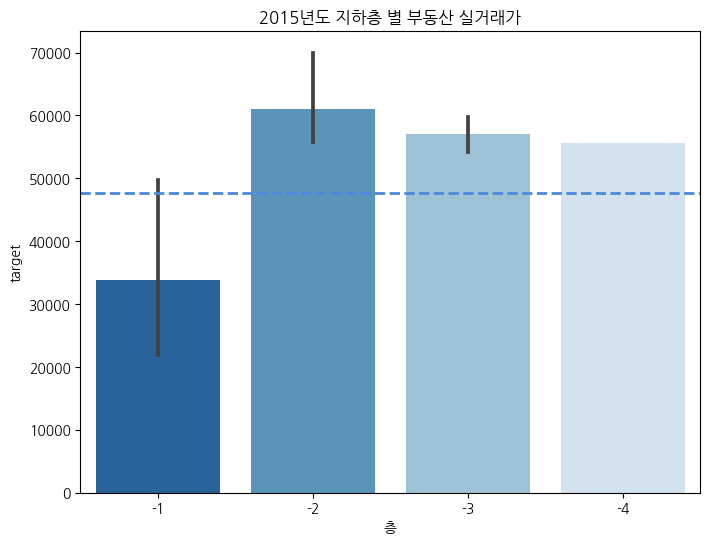

In [75]:
temp = temp[(temp['계약년'] == '2015')].loc[:, ['층', 'target']].copy()

plt.figure(figsize=(8, 6))
sns.barplot(x=temp['층'], y=temp['target'], order=sorted(temp['층'].unique(), reverse=True), palette='Blues_r')
plt.axhline(mean_value, color='#4B89DC', linestyle='--', linewidth=2, label='2015년도 전체 부동산 실거래가 평균값')
plt.title('2015년도 지하층 별 부동산 실거래가')
plt.show()

### 건축년도

In [76]:
df_temp = df_train.loc[:, ['시군구', '아파트명', '건축년도', 'target']].copy()
df_temp

,시군구,아파트명,건축년도,target
0,서울특별시 강남구 개포동,개포6차우성,1987,124000
1,서울특별시 강남구 개포동,개포6차우성,1987,123500
2,서울특별시 강남구 개포동,개포6차우성,1987,91500
3,서울특별시 강남구 개포동,개포6차우성,1987,130000
4,서울특별시 강남구 개포동,개포6차우성,1987,117000
...,...,...,...,...
1118817,서울특별시 은평구 구산동,갈현현대,1998,20000
1118818,서울특별시 은평구 구산동,갈현현대,1998,20000
1118819,서울특별시 은평구 구산동,갈현현대,1998,28000
1118820,서울특별시 은평구 구산동,갈현현대,1998,29000


In [77]:
df_temp.isna().sum()

시군구          0
아파트명      2126
건축년도         0
target       0
dtype: int64

In [78]:
temp = df_temp['건축년도'].value_counts()
temp.index

Int64Index([2004, 2003, 1999, 2000, 1988, 2005, 1998, 2001, 1997, 2002, 2008,
            2006, 1992, 1996, 1993, 2007, 1995, 1994, 1987, 2009, 1989, 1986,
            2010, 2011, 2014, 2012, 1990, 1991, 1983, 2013, 1982, 1984, 1980,
            2015, 2016, 1978, 1985, 1979, 1981, 2018, 2019, 2017, 1974, 2020,
            1976, 1971, 1977, 1975, 2021, 1973, 1970, 1972, 2022, 1969, 1968,
            1966, 2023, 1961, 1967, 1965],
           dtype='int64')

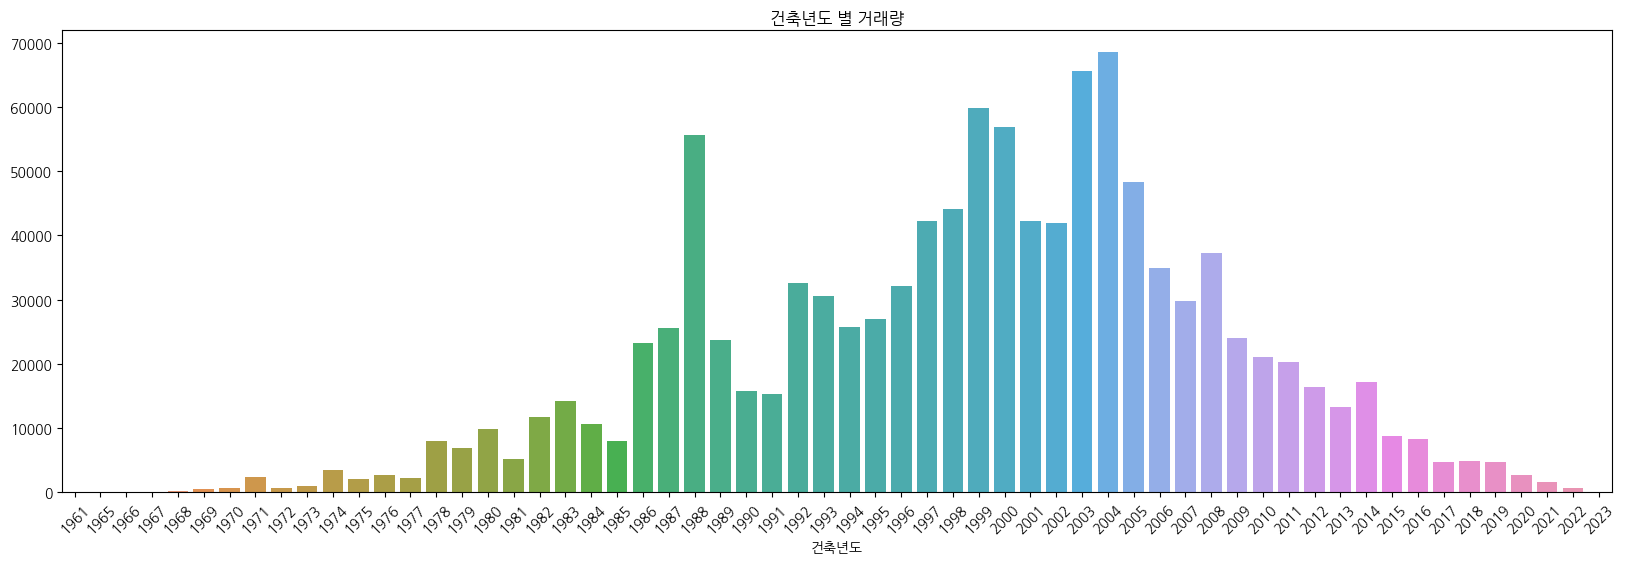

In [79]:
# 1. 각 건축년도 별 value_count
plt.figure(figsize=(20, 6))
temp = df_temp['건축년도'].value_counts()
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index))
plt.xticks(rotation=45)
plt.xlabel('건축년도')
plt.title('건축년도 별 거래량')
plt.show()


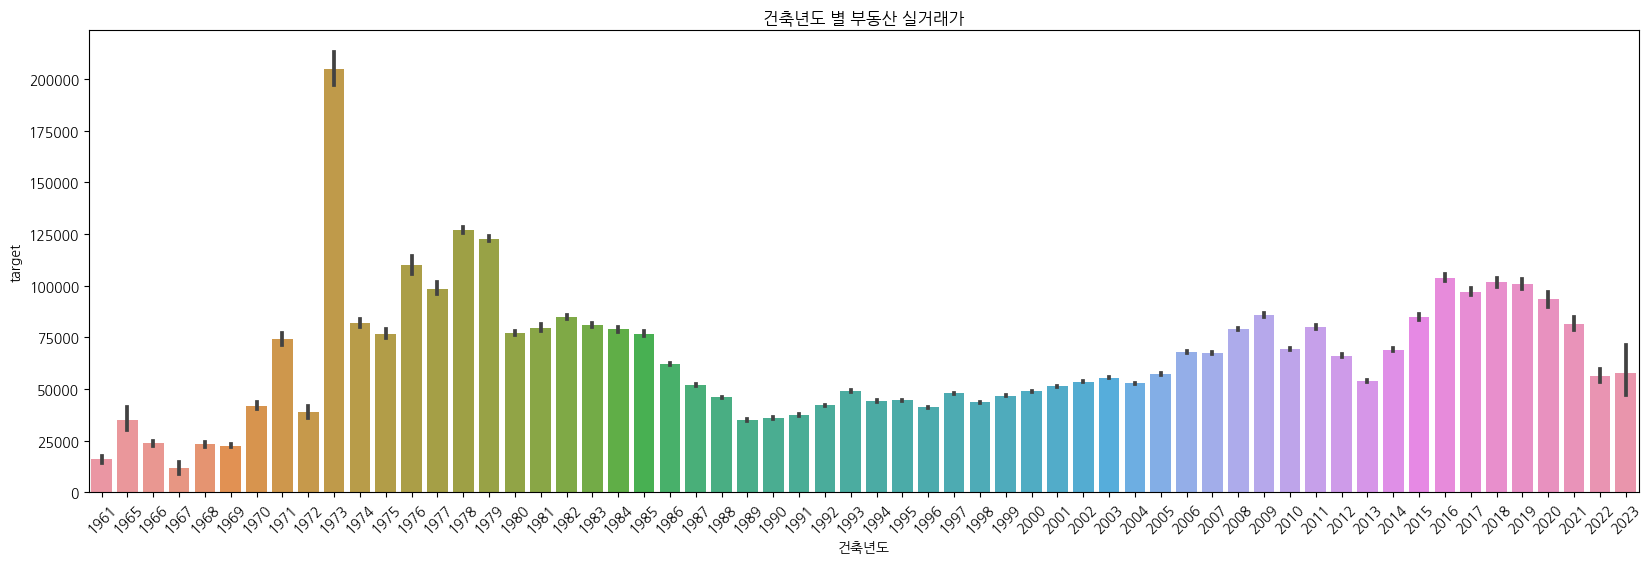

In [80]:
# 2. 각 건축년도 별 target 
plt.figure(figsize=(20, 6))
sns.barplot(x=df_temp['건축년도'], y=df_temp['target'], order=sorted(df_temp['건축년도'].unique()))
plt.xticks(rotation=45)
plt.title('건축년도 별 부동산 실거래가')
plt.show()

In [81]:
# 1973년에 지어진 아파트의 이름, 시군구를 확인해보자.
df_temp[df_temp['건축년도'] == 1973].loc[:, ['시군구', '아파트명']].value_counts()

시군구             아파트명    
서울특별시 서초구 반포동   반포주공1단지     778
서울특별시 은평구 갈현동   역촌맨션         79
서울특별시 서대문구 홍제동  광산           56
서울특별시 종로구 창신동   동대문맨션        35
서울특별시 용산구 보광동   주미           34
서울특별시 용산구 이촌동   타워맨션         29
서울특별시 용산구 후암동   뉴후암          22
서울특별시 용산구 이태원동  남산힐레지던스       6
서울특별시 용산구 한남동   유엔맨숀          4
서울특별시 종로구 필운동   사직파크맨션        2
서울특별시 종로구 창신동   201호 미공시      1
dtype: int64

### 해제사유발생일

In [82]:
# 해제사유 여부(True, False)를 담은 데이터로 변환하기!
df_train[['해제사유발생일']].isna().sum() / df_train.shape[0]

해제사유발생일    0.994652
dtype: float64

### 등기신청일자

In [83]:
# 의미없는 공백이 결측치로 판단된다.
df_train[['등기신청일자']].value_counts()

등기신청일자  
            1103907
20230630        585
20230428        394
20230831        391
20230530        367
             ...   
20230125          3
20230110          3
20230109          1
20230102          1
20230104          1
Length: 182, dtype: int64

In [84]:
df_temp = df_train[['등기신청일자', 'target']].copy()
df_temp

,등기신청일자,target
0,,124000
1,,123500
2,,91500
3,,130000
4,,117000
...,...,...
1118817,,20000
1118818,,20000
1118819,,28000
1118820,,29000


In [85]:
# 등기신청일자를 시각화 해보기
df_temp['등기신청일자'] = df_temp['등기신청일자'].astype('str')
 
df_temp['등기신청년도'] = df_temp['등기신청일자'].map(lambda x: x[:4])
df_temp['등기신청월'] = df_temp['등기신청일자'].map(lambda x: x[4:6])
df_temp['등기신청일'] = df_temp['등기신청일자'].map(lambda x: x[6:])
df_temp

,등기신청일자,target,등기신청년도,등기신청월,등기신청일
0,,124000,,,
1,,123500,,,
2,,91500,,,
3,,130000,,,
4,,117000,,,
...,...,...,...,...,...
1118817,,20000,,,
1118818,,20000,,,
1118819,,28000,,,
1118820,,29000,,,


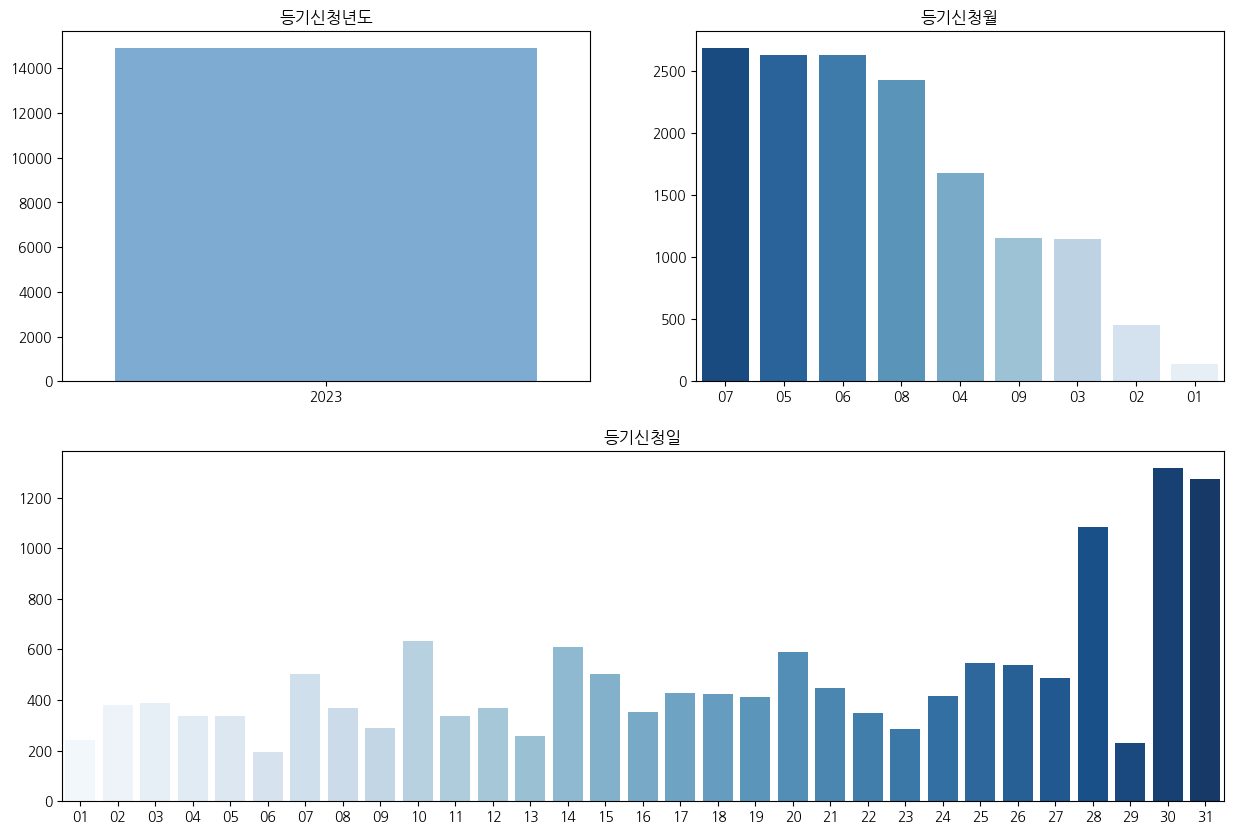

In [86]:
# 1. 등기신청년도
df_temp['등기신청년도'] = df_temp['등기신청년도'].replace(' ', np.nan)
temp = df_temp['등기신청년도'].value_counts()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x=temp.index, y=temp.values, color='#6FACDF')
plt.title('등기신청년도')

# 2. 등기신청월
df_temp['등기신청월'] = df_temp['등기신청월'].replace('', np.nan)
temp = df_temp['등기신청월'].value_counts()

plt.subplot(2, 2, 2)
sns.barplot(x=temp.index, y=temp.values, palette='Blues_r')
plt.title('등기신청월')

# 3. 등기신청일
df_temp['등기신청일'] = df_temp['등기신청일'].replace('', np.nan)
temp = df_temp['등기신청일'].value_counts()

plt.subplot(2, 2, (3, 4))
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index), palette='Blues')
plt.title('등기신청일')

plt.show()


### 거래유형

In [87]:
# 결측치가 '-' 로 나타난다.
df_train['거래유형'].value_counts()

-       1086451
중개거래      29271
직거래        3100
Name: 거래유형, dtype: int64

In [88]:
df_train[df_train['거래유형'] == '-'].shape[0] / df_train.shape[0]

0.9710668899968002

In [89]:
# 혹시 거래유형과 등기신청일이 같은 분포를 보이는지 확인해보자.
df_temp = df_train[['등기신청일자', '거래유형']].copy()
df_temp[(df_temp['등기신청일자'] == ' ') & (df_temp['거래유형'] == '-')].value_counts()

등기신청일자  거래유형
        -       1086451
dtype: int64

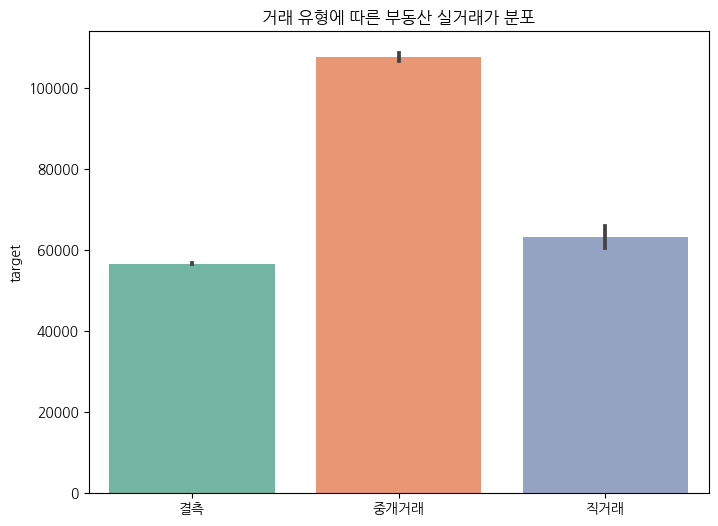

In [90]:
#  거래유형이 존재할 때 target 값이 유의미한 변화를 보이는지 확인
df_temp = df_train[['거래유형', 'target']].copy()

plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['거래유형'], y=df_temp['target'], palette='Set2')
plt.xticks(ticks=[0, 1, 2], labels=['결측', '중개거래', '직거래'])
plt.xlabel(None)
plt.title('거래 유형에 따른 부동산 실거래가 분포')
plt.show()

In [91]:
# 중개거래가 발생한 년도가 비교적 최근이라 가격이 높게 형성된 것은 아닐까?
df_temp = df_train[['거래유형', '계약년월', 'target']].copy()

df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x:x[:4])
df_temp

missing_year = int(df_temp[(df_temp['거래유형'] == '-')].loc[:, ['계약년도']].astype('int').mean())
broker_year = int(df_temp[(df_temp['거래유형'] == '중개거래')].loc[:, ['계약년도']].astype('int').mean())
direct_year = int(df_temp[(df_temp['거래유형'] == '직거래')].loc[:, ['계약년도']].astype('int').mean())

print(missing_year, broker_year, direct_year)

2014 2022 2022


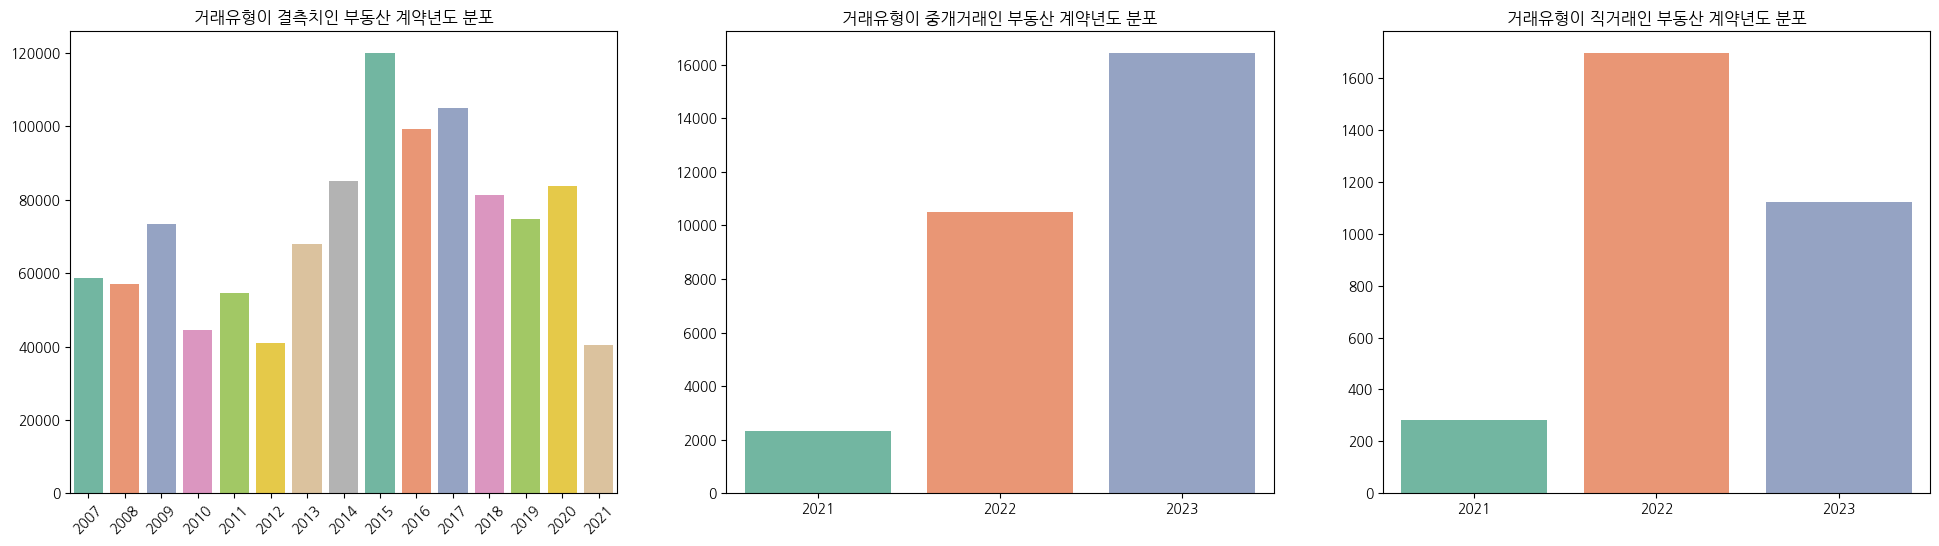

In [92]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
temp = df_temp[df_temp['거래유형'] == '-'].loc[:, '계약년도'].value_counts()
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index), palette='Set2')
plt.xticks(rotation=45)
plt.title('거래유형이 결측치인 부동산 계약년도 분포')


plt.subplot(1, 3, 2)
temp = df_temp[df_temp['거래유형'] == '중개거래'].loc[:, '계약년도'].value_counts()
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index), palette='Set2')
plt.title('거래유형이 중개거래인 부동산 계약년도 분포')

plt.subplot(1, 3, 3)
temp = df_temp[df_temp['거래유형'] == '직거래'].loc[:, '계약년도'].value_counts()
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index), palette='Set2')
plt.title('거래유형이 직거래인 부동산 계약년도 분포')

plt.show()



### 중개사소재지

In [93]:
df_train['중개사소재지'].value_counts()

-                    1089581
서울 강남구                  2000
서울 송파구                  1995
서울 노원구                  1966
서울 강동구                  1597
                      ...   
경기 성남중원구, 서울 노원구           1
서울 강북구, 서울 양천구             1
서울 관악구, 서울 노원구             1
경기 남양주시, 경기 성남수정구          1
서울 동대문구, 인천 연수구            1
Name: 중개사소재지, Length: 643, dtype: int64

In [94]:
df_train[df_train['중개사소재지'] == '-'].shape[0] / df_train.shape[0]

0.9738644753142144

In [95]:
# 혹시 거래유형과 등기신청일이 같은 분포를 보이는지 확인해보자.
df_temp = df_train[['등기신청일자', '중개사소재지']].copy()
df_temp[(df_temp['등기신청일자'] == ' ')  & (df_temp['중개사소재지'] == '-')].value_counts()

등기신청일자  중개사소재지
        -         1088589
dtype: int64

### k-단지분류(아파트, 주상복합등등)

In [96]:
df_train['k-단지분류(아파트,주상복합등등)'].value_counts()

아파트               235994
주상복합               11360
도시형 생활주택(주상복합)       500
도시형 생활주택(아파트)        152
연립주택                 125
Name: k-단지분류(아파트,주상복합등등), dtype: int64

In [97]:
df_train['k-단지분류(아파트,주상복합등등)'].isna().sum() / df_train.shape[0]

0.7782212005126821

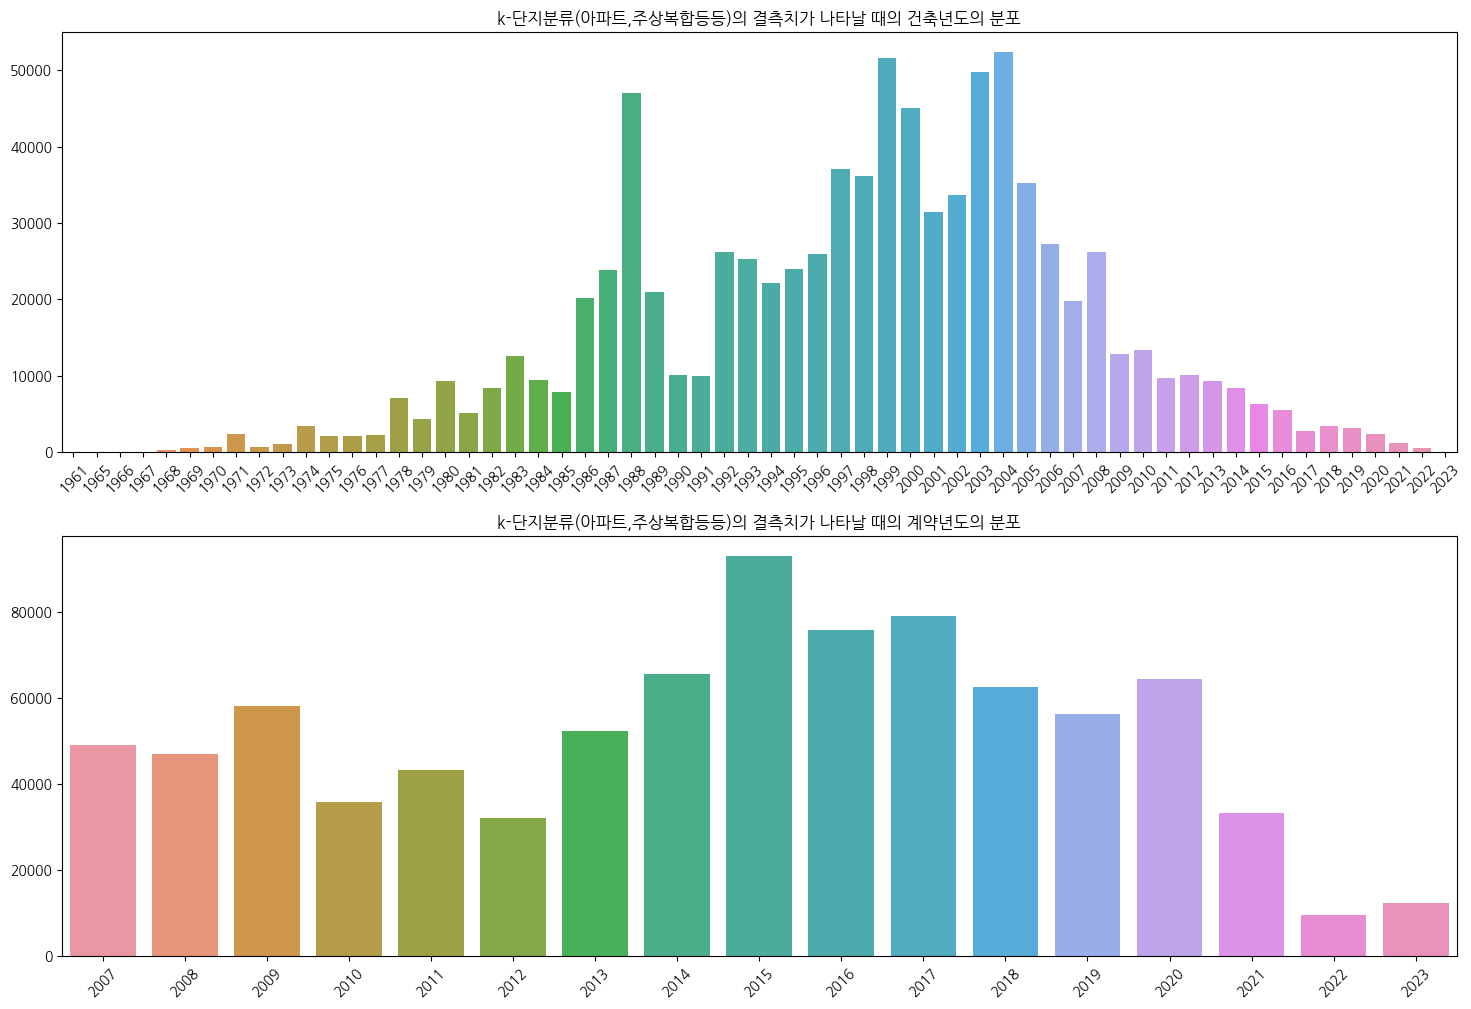

In [98]:
# 특정 기간 이후에 정보가 수집되었을 가능성 확인하기
df_temp = df_train.loc[:, ['k-단지분류(아파트,주상복합등등)', '건축년도', '계약년월', 'target']].copy()

# 1. 건축년도
temp = df_temp[df_temp['k-단지분류(아파트,주상복합등등)'].isna()].loc[:, '건축년도'].value_counts()

plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
sns.barplot(x=temp.index, y=temp.values)
plt.title('k-단지분류(아파트,주상복합등등)의 결측치가 나타날 때의 건축년도의 분포')
plt.xticks(rotation=45)

# 2. 계약년월
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
temp = df_temp[df_temp['k-단지분류(아파트,주상복합등등)'].isna()].loc[:, '계약년도'].value_counts()
plt.subplot(2, 1, 2)
sns.barplot(x=temp.index, y=temp.values, order=sorted(temp.index))
plt.title('k-단지분류(아파트,주상복합등등)의 결측치가 나타날 때의 계약년도의 분포')
plt.xticks(rotation=45)
plt.show()

### k-전화번호

In [99]:
df_train['k-전화번호']

0            025776611
1            025776611
2            025776611
3            025776611
4            025776611
              ...     
1118817     23547358.0
1118818     23547358.0
1118819     23547358.0
1118820     23547358.0
1118821    222722129.0
Name: k-전화번호, Length: 1118822, dtype: object

In [100]:
df_train['k-전화번호'].isna().sum() / df_train.shape[0]

0.7778484870694355

In [101]:
df_temp = df_train.loc[:, ['아파트명', '중개사소재지', 'k-전화번호']].copy()


# 아파트 관리실 번호인가?
# 같은 아파트에서의 번호가 같은지 확인
temp = df_temp.groupby(['아파트명', 'k-전화번호']).aggregate(['count'])
temp.columns = ['count']
temp

count
아파트명        k-전화번호            
DMC두산위브     023767676      214
DMC래미안e편한세상 023023105     1490
DMC래미안클라시스  023762743     1137
DMC롯데캐슬더퍼스트 23038182.0      21
            023038182       21
...                        ...
힐스테이트서울숲리버  0222820584      46
힐스테이트신촌     023134551       13
힐스테이트청계     233949333.0     45
            0233949333      69
힐스테이트클래시안   028339266       29

[1082 rows x 1 columns]

### k-팩스번호

In [102]:
df_train['k-팩스번호'].isna().sum() / df_train.shape[0]

0.7800543786232305

In [103]:
df_temp = df_train.loc[:, ['아파트명', '중개사소재지', 'k-팩스번호']].copy()


# 아파트 관리실 번호인가?
# 같은 아파트에서의 번호가 같은지 확인
temp = df_temp.groupby(['아파트명', 'k-팩스번호']).aggregate(['count'])[:20]
temp.columns = ['count']
temp

count
아파트명          k-팩스번호           
DMC두산위브       23767677.0    213
              023767677       1
DMC래미안e편한세상   23023107.0   1478
              023023107      12
DMC래미안클라시스    23762745.0   1129
              023762745       8
DMC롯데캐슬더퍼스트   23038183.0     21
              023038183      21
DMC마포청구       23053111.0    229
              023053111       1
DMC문영퀸즈파크     23031062.0     22
              023031062      71
DMC상암센트럴파크1단지 23072360.0    108
              023072360       1
DMC상암센트럴파크2단지 23074530.0    139
              023074530       1
DMC센트레빌       23091489.0    253
              023091489      38
DMC아이파크       23762810.0    252
              023762810       1

### 단지소개기존clob

In [104]:
df_train['단지소개기존clob']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1118817   NaN
1118818   NaN
1118819   NaN
1118820   NaN
1118821   NaN
Name: 단지소개기존clob, Length: 1118822, dtype: float64

In [105]:
df_train['단지소개기존clob'].value_counts()

4.0       23845
1474.0     2465
638.0      2346
301.0      2093
2315.0     1558
          ...  
2039.0      118
63.0        113
217.0       111
24.0        107
1417.0       51
Name: 단지소개기존clob, Length: 94, dtype: int64

In [106]:
df_train['단지소개기존clob'].isna().sum() / df_train.shape[0]

0.9387015986457184

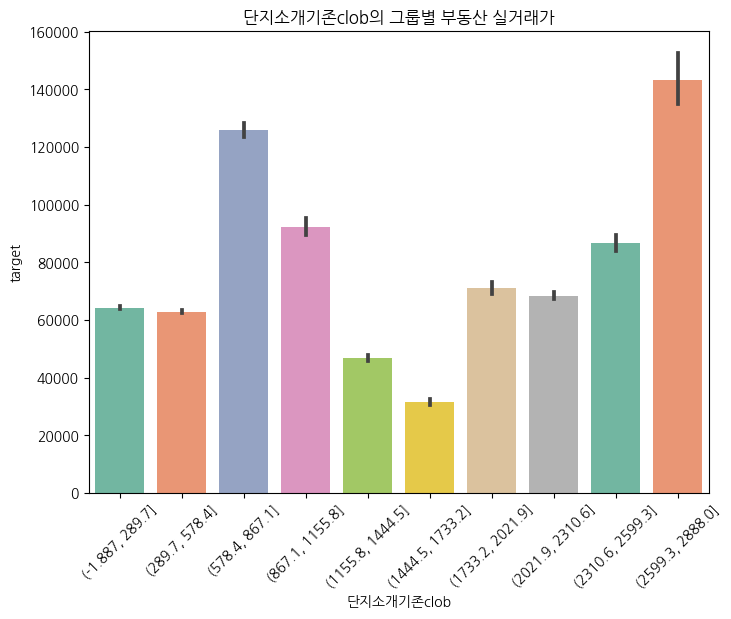

In [107]:
df_temp = df_train[['단지소개기존clob', 'target']].copy()
cut = pd.cut(df_temp['단지소개기존clob'], bins=10)
cut = pd.concat([cut, df_temp['target']], axis=1)

plt.figure(figsize=(8, 6))
sns.barplot(x=cut['단지소개기존clob'], y=cut['target'], palette='Set2')
plt.title('단지소개기존clob의 그룹별 부동산 실거래가')
plt.xticks(rotation=45)
plt.show()

### k-세대타입(분양형태)

In [108]:
df_train['k-세대타입(분양형태)']

0          분양
1          분양
2          분양
3          분양
4          분양
           ..
1118817    분양
1118818    분양
1118819    분양
1118820    분양
1118821    분양
Name: k-세대타입(분양형태), Length: 1118822, dtype: object

In [109]:
df_train['k-세대타입(분양형태)'].value_counts()

분양    206371
기타     40686
임대      2202
Name: k-세대타입(분양형태), dtype: int64

In [110]:
df_train['k-세대타입(분양형태)'].isna().sum() / df_train.shape[0]

0.7772129972417418

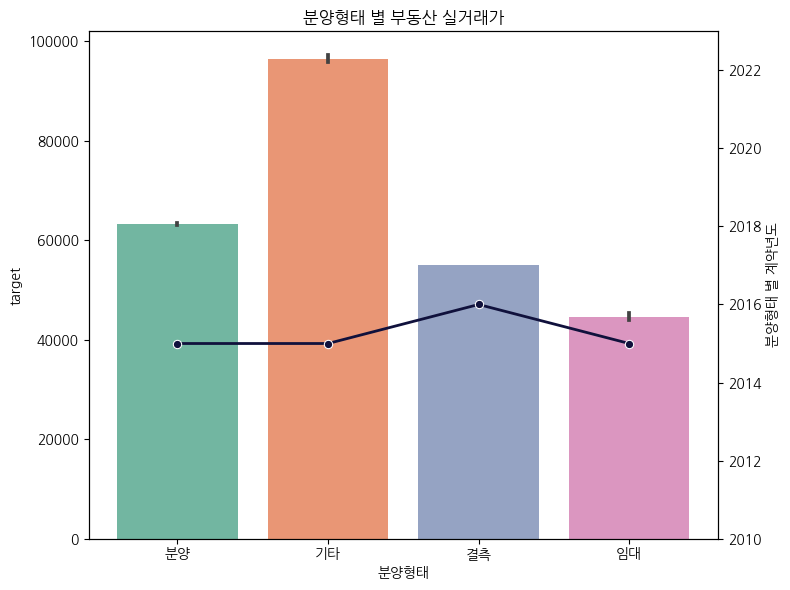

In [111]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['k-세대타입(분양형태)','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['k-세대타입(분양형태)'].isna(), ['k-세대타입(분양형태)']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['k-세대타입(분양형태)'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('분양형태 별 부동산 실거래가')
ax1.set_xlabel('분양형태')


mean_year = []
values = df_temp['k-세대타입(분양형태)'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['k-세대타입(분양형태)'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('분양형태 별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### k-관리방식

In [112]:
df_train['k-관리방식'].value_counts()

위탁관리    227842
자치관리     18005
직영        3412
Name: k-관리방식, dtype: int64

In [113]:
df_train['k-관리방식'].isna().sum() / df_train.shape[0]

0.7772129972417418

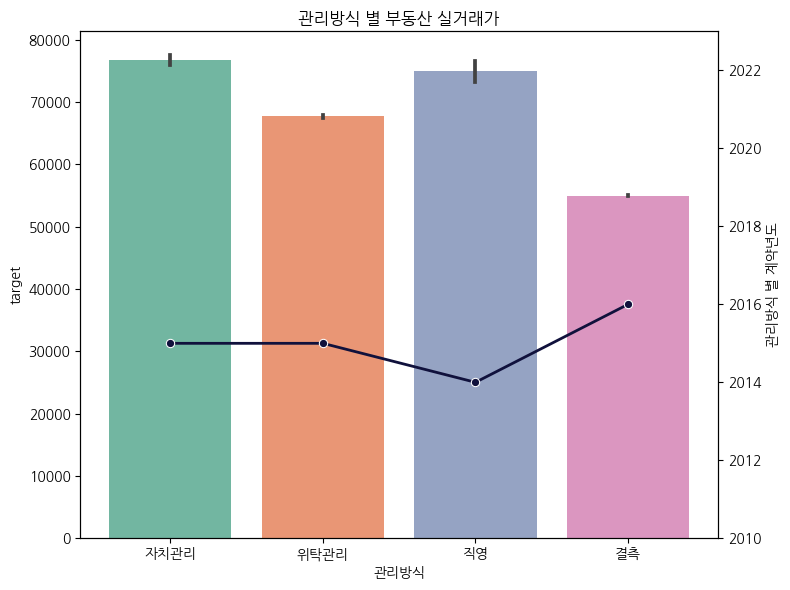

In [114]:
df_temp = df_train[['k-관리방식','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['k-관리방식'].isna(), ['k-관리방식']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['k-관리방식'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('관리방식 별 부동산 실거래가')
ax1.set_xlabel('관리방식')

mean_year = []
values = df_temp['k-관리방식'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['k-관리방식'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('관리방식 별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()


### k-복도유형

In [115]:
df_train['k-복도유형'].value_counts()

계단식    123651
혼합식     84491
복도식     38383
타워형      1340
기타       1067
Name: k-복도유형, dtype: int64

In [116]:
df_train['k-복도유형'].isna().sum() / df_train.shape[0]

0.7775052689346473

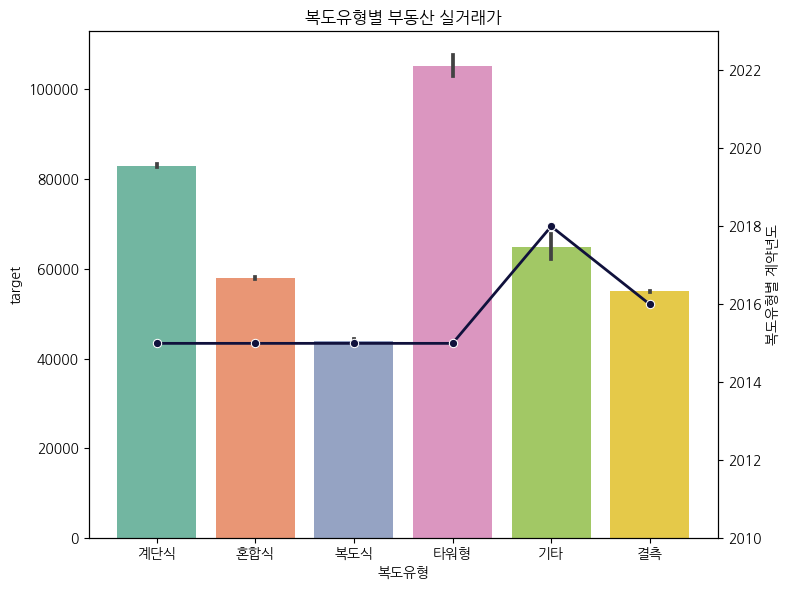

In [117]:
df_temp = df_train[['k-복도유형','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['k-복도유형'].isna(), ['k-복도유형']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['k-복도유형'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('복도유형별 부동산 실거래가')
ax1.set_xlabel('복도유형')

mean_year = []
values = df_temp['k-복도유형'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['k-복도유형'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('복도유형별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### k-난방방식

In [118]:
df_train['k-난방방식'].isna().sum() / df_train.shape[0]

0.7772129972417418

In [119]:
df_train['k-난방방식'].value_counts()

개별난방    150739
지역난방     83891
중앙난방     12591
기타        2038
Name: k-난방방식, dtype: int64

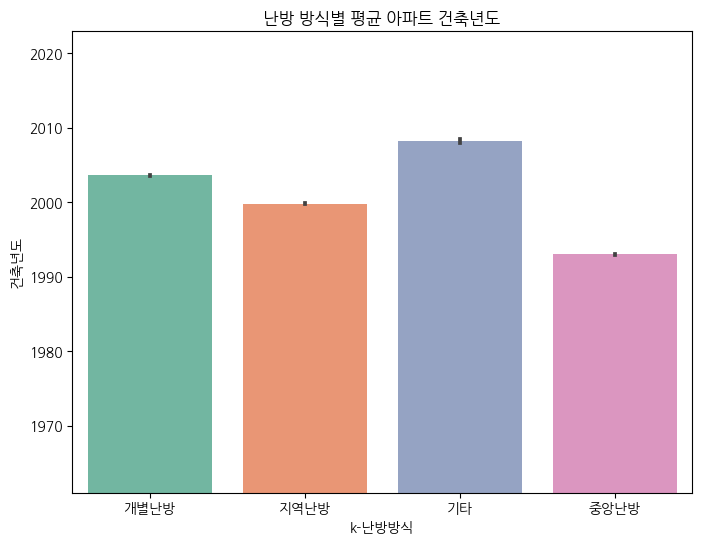

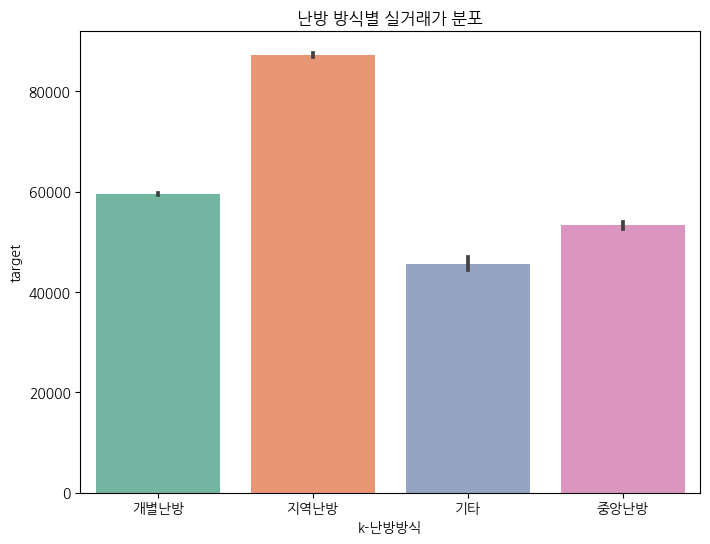

In [120]:
# 1. 난방 별 건축년도 살펴보기
df_temp = df_train[['k-난방방식', '건축년도', 'target']].copy()
plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['k-난방방식'], y=df_temp['건축년도'], palette='Set2')
plt.ylim(1961, 2023)
plt.title('난방 방식별 평균 아파트 건축년도')
plt.show()

# 2. 난방 별 실거래가 살펴보기
plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['k-난방방식'], y=df_temp['target'], palette='Set2')
plt.title('난방 방식별 실거래가 분포')
plt.show()

### k-전체동수

In [121]:
df_train['k-전체동수'].isna().sum() / df_train.shape[0]

0.7781666788818954

In [122]:
df_train['k-전체동수'].value_counts()

10.0     19801
2.0      17162
6.0      16167
3.0      15271
4.0      13245
1.0      12348
5.0      11775
7.0      11694
9.0      10825
8.0      10644
14.0      9801
15.0      8900
11.0      8030
12.0      7722
28.0      7567
13.0      6997
19.0      6550
16.0      4667
22.0      4215
31.0      3966
32.0      3806
23.0      3198
72.0      3028
124.0     2816
56.0      2589
30.0      2584
20.0      2451
33.0      2360
44.0      2346
34.0      2187
17.0      1679
24.0      1673
18.0      1586
40.0      1496
51.0      1490
21.0      1377
50.0      1365
37.0      1008
26.0       815
41.0       507
84.0       484
Name: k-전체동수, dtype: int64

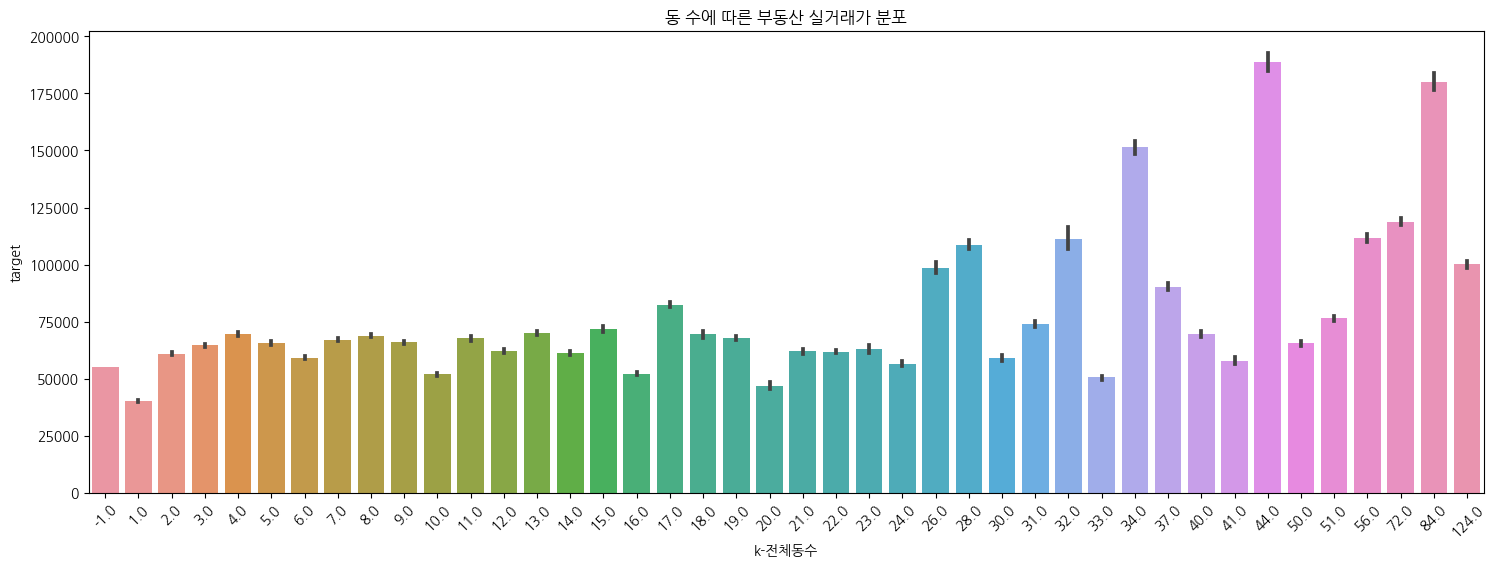

In [123]:
df_temp = df_train[['k-전체동수', 'target']].copy()

# 결측치 -1로 처리
df_temp.loc[df_temp['k-전체동수'].isna(), ['k-전체동수']] = -1.0

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp['k-전체동수'], y=df_temp['target'])
plt.xticks(rotation=45)
plt.title('동 수에 따른 부동산 실거래가 분포')
plt.show()

### k-전체세대수

In [124]:
df_train['k-전체세대수'].value_counts()

5678.0    3028
5040.0    2816
4494.0    2589
4424.0    2562
2433.0    2465
          ... 
494.0        2
514.0        2
799.0        1
243.0        1
1395.0       1
Name: k-전체세대수, Length: 521, dtype: int64

In [125]:
df_train['k-전체세대수'].isna().sum() / df_train.shape[0]

0.7772129972417418

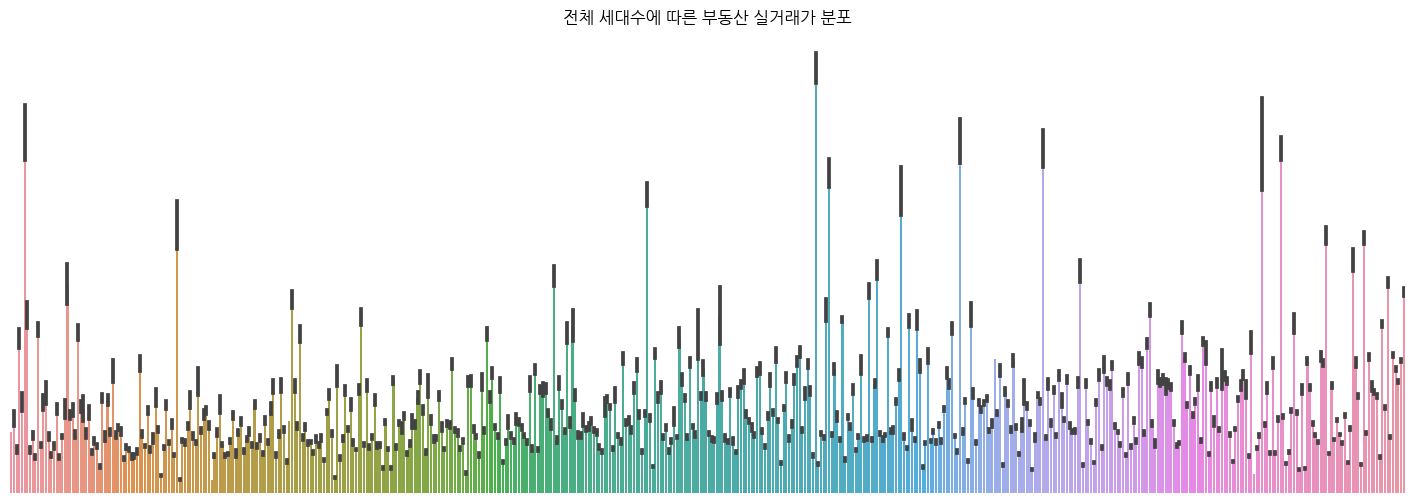

In [126]:
df_temp = df_train[['k-전체세대수', 'target']].copy()

# 결측치 -1로 처리
df_temp.loc[df_temp['k-전체세대수'].isna(), ['k-전체세대수']] = -1.0

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp['k-전체세대수'], y=df_temp['target'])
plt.gca().set_axis_off()
plt.title('전체 세대수에 따른 부동산 실거래가 분포')
plt.show()

### k-건설사(시공사) & k-시행사

In [127]:
df_train['k-건설사(시공사)'].isna().sum() / df_train.shape[0]

0.7785492240946281

In [128]:
construction_list = df_train['k-건설사(시공사)'].unique()
construction_list = construction_list.tolist()
display(construction_list)
print(len(construction_list))

['우성건설',
 '박연정',
 '대한주택공사',
 '현대건설(주)',
 '동양고속건설주식회사',
 '대우건설',
 '대림산업(주)',
 '삼성물산',
 nan,
 '삼성물산주식회사',
 '현대,쌍용,GS',
 '쌍용건설(주)',
 '현대산업개발',
 '한보',
 '삼성중공업',
 '대성산업',
 '중앙건설',
 '세방기업',
 '태영건설',
 '신동아',
 '신동아건설',
 '고려개발(주)',
 '대우건설,대림산업,태영건설',
 '한라, 두진',
 '고려산업개발(주)',
 '삼성건설',
 '롯데건설',
 'GS건설',
 '(주)한화건설',
 '한신공영',
 '(주)건영,삼익주택,라이프주택',
 '계룡건설산업(주)',
 '한양수자인',
 '건영종합건설(주)',
 '청담삼익아파트',
 '계룡건설(주)',
 '삼환기업',
 '한신공영(주)',
 'KR산업',
 '동부건설',
 '고속도로관리공단',
 '동부건설(주)외1',
 'SH공사',
 '남광, 대우',
 'sh공사',
 '청광종합건설(주)',
 '중앙건설(주)',
 'LG건설',
 '신동아건설(주)',
 '현대산업개발(주)',
 '(주)청구주택',
 '삼호건설',
 '(주)삼호',
 '한솔건설',
 '현대,대림',
 '신동아 건설(주)',
 '임광토건(주)',
 '롯데건설(주)',
 '벽산건설',
 '동부건설(주)',
 '현대 성우건설',
 '홍익종합건업(주)',
 '한양주택 (주)',
 '한진중공업(주)',
 '성지건설',
 '남광토건(주)',
 'gs건설',
 '신명건설,신원건설,미주건설',
 'KCC',
 '두산, 이수건설',
 '두산건설',
 'TEC건설',
 '현대건설,현대산업개발,한진중공업',
 '성원건설(주)',
 '라인건설',
 '코오롱글로벌(주)',
 '금호건설',
 '(주)대보건설',
 '(주)한양',
 '경남기업',
 '에스에이치공사',
 '금호',
 '(주)서광건설산업',
 '우림건설(주)',
 '중앙하이츠',
 '청구',
 '우림건설',
 '삼환, 삼익건설',
 '(주)현대건설',
 '

345


In [129]:
construction_result = {}

def check(string):
    global construction_list

    temps = []

    for construction in construction_list:
        if str(construction).upper().find(string) != -1:
            temps.append(construction)

    construction_result[string] = temps

    construction_list = [i for i in construction_list if i not in temps]

In [130]:
string_set = set(['우성', '박연정', '대한', '현대', '동양', '대우', '대림', '삼성',
                  '쌍용', '한보', '대성', '중앙', '세방', '태영', '신동아', '고려',
                  '한라', '롯데', 'GS', '한화', '한신', '건영', '계룡', '수자인', '삼익',
                  '삼환', 'KR산업', '동부', '고속도로관리공단', 'SH', '남광', '청광',
                  'LG', '청구', '삼호', '한솔', '임광', '벽산', '홍익', '한양', '한진', '성지',
                  '신명', 'KCC', '두산', 'TEC', '성원', '라인', '코오롱', '금호', '대보',
                  '경남', '서광', '우림', '삼환', '보람', '한일', '서희', 
                  '대호', '라이프', '갑을', 'SK', '우성', '인정', '재건축', '월드', '포스코',
                  '풍림', '한진', '신도', '도시개발공사', '효성', '세양', '럭키', '대백',
                  '극동', '주택공사', 'BYC', '신성', '동일', '신한', '경동', '극동', '남해',
                  'LIG', '경향', '라성', '해태', '동양', '재개발', '동원', '쌍용', '양우', '서광',
                  '대동', '진흥', '우방', '이수', '우리', '청구', '계룡', '대림', '우정', '한보',
                  '흥화', '아남', '유원', '풍림', '울트라', '금호', '삼부', '동아', '동일',
                  '대명', '대주', '선경', '아키데코', '미주', '신일', '한양', '동성', '호반',
                  '한라', '일성', '양우', '삼중', '신창', '한진', '나산', '금하', '유원', 
                  '서초', '미원', '상부', '순영', 'JR', '해주', '대창', '토왕', '문영', '삼전',
                  '신홍', '예성', '공영', '알포메', '흥화', '일신', '호반', '공감', '삼정',
                  '월드', '한승', '현진', '우리', '자이에스앤디', 'HDC', '혜림', '신영'])

string_set

{'BYC',
 'GS',
 'HDC',
 'JR',
 'KCC',
 'KR산업',
 'LG',
 'LIG',
 'SH',
 'SK',
 'TEC',
 '갑을',
 '건영',
 '경남',
 '경동',
 '경향',
 '계룡',
 '고려',
 '고속도로관리공단',
 '공감',
 '공영',
 '극동',
 '금하',
 '금호',
 '나산',
 '남광',
 '남해',
 '대동',
 '대림',
 '대명',
 '대백',
 '대보',
 '대성',
 '대우',
 '대주',
 '대창',
 '대한',
 '대호',
 '도시개발공사',
 '동부',
 '동성',
 '동아',
 '동양',
 '동원',
 '동일',
 '두산',
 '라성',
 '라이프',
 '라인',
 '럭키',
 '롯데',
 '문영',
 '미원',
 '미주',
 '박연정',
 '벽산',
 '보람',
 '삼부',
 '삼성',
 '삼익',
 '삼전',
 '삼정',
 '삼중',
 '삼호',
 '삼환',
 '상부',
 '서광',
 '서초',
 '서희',
 '선경',
 '성원',
 '성지',
 '세방',
 '세양',
 '수자인',
 '순영',
 '신도',
 '신동아',
 '신명',
 '신성',
 '신영',
 '신일',
 '신창',
 '신한',
 '신홍',
 '쌍용',
 '아남',
 '아키데코',
 '알포메',
 '양우',
 '예성',
 '우리',
 '우림',
 '우방',
 '우성',
 '우정',
 '울트라',
 '월드',
 '유원',
 '이수',
 '인정',
 '일성',
 '일신',
 '임광',
 '자이에스앤디',
 '재개발',
 '재건축',
 '주택공사',
 '중앙',
 '진흥',
 '청광',
 '청구',
 '코오롱',
 '태영',
 '토왕',
 '포스코',
 '풍림',
 '한라',
 '한보',
 '한솔',
 '한승',
 '한신',
 '한양',
 '한일',
 '한진',
 '한화',
 '해주',
 '해태',
 '현대',
 '현진',
 '혜림',
 '호반',
 '홍익',
 '효성',
 '흥화'}

In [131]:
for string in string_set:
    check(string)
    
print(construction_result)

{'대한': ['대한주택공사', '대한전척(주)'], '한진': ['한진중공업(주)', '현대건설,현대산업개발,한진중공업', '한진중공업', '(주)한진중공업', '한진건설(주)'], '금호': ['금호건설', '금호', '(주)금호건설', '금호산업', '금호자이', '금호건설(주)', '(주)금호산업', '(주)금호'], '대호': ['대호아이피종합건설'], '신창': ['신창건설(주)->우방건설', '(주)신창건설'], '계룡': ['계룡건설산업(주)', '계룡건설(주)', '계룡건설'], '한신': ['한신공영', '한신공영(주)', '한신공영(주), 한양산업개발(주'], '삼환': ['삼환기업', '삼환, 삼익건설'], '한일': ['한일건설', '한일개발'], '우리': ['(주)우리건설', '(주)우리창우', '우리건설'], '대림': ['대림산업(주)', '대우건설,대림산업,태영건설', '현대,대림', '대림산업', '삼성물산, 대림산업', '대림', '(주)대림산업', '대림산업주식회사', '(주)대림/ (주)삼성', '대림건설', '대림산업 (주)', '대림,삼성,현대,현산', '대림건설(주)', '대림산업, 롯데건설'], '수자인': ['한양수자인'], '동성': ['동성개발'], '대창': ['대창건설'], '세방': ['세방기업'], '미원': ['미원건설(주)'], '갑을': ['갑을건설'], '동일': ['(주)동일토건', '동일하이빌', '동일토건', '동일'], '현대': ['현대건설(주)', '현대,쌍용,GS', '현대산업개발', '현대산업개발(주)', '현대 성우건설', '(주)현대건설', '현대건설', '현대건설주식회사', '현대종합건설', '풍림산업,현대건설', '현대엔지니어링', '현대bs&c', '현대BS&C', '삼성물산, 현대산업개발', '포스코,SK,현대', '현대힐스테이트', '태영건설, 현대산업개발', '현대산업개발 주', '주시회사 현대건설', '(주)현대산업개발', '현대건설,삼성물산,현대산업개발', 'HD

In [132]:
# 분류하지 못한 나머지
construction_list

[nan,
 '에스에이치공사',
 '엘지건설(주)',
 '지에스건설주식회사',
 '?양건설',
 '지에스 건설',
 '(주)에스에이치건설',
 '지에스건설(주)',
 '(주)에스케이건설']

In [133]:
construction_result['기타'] = ['nan', '?양건설']
construction_result['SH'].extend(['에스에이치공사', '(주)에스에이치건설']) 
construction_result['LG'].extend(['엘지건설(주)'])
construction_result['GS'].extend(['지에스건설주식회사', '지에스 건설', '지에스건설(주)'])
construction_result['SK'].extend(['(주)에스케이건설'])

In [134]:
construction_result

{'대한': ['대한주택공사', '대한전척(주)'],
 '한진': ['한진중공업(주)', '현대건설,현대산업개발,한진중공업', '한진중공업', '(주)한진중공업', '한진건설(주)'],
 '금호': ['금호건설',
  '금호',
  '(주)금호건설',
  '금호산업',
  '금호자이',
  '금호건설(주)',
  '(주)금호산업',
  '(주)금호'],
 '대호': ['대호아이피종합건설'],
 '신창': ['신창건설(주)->우방건설', '(주)신창건설'],
 '계룡': ['계룡건설산업(주)', '계룡건설(주)', '계룡건설'],
 '한신': ['한신공영', '한신공영(주)', '한신공영(주), 한양산업개발(주'],
 '삼환': ['삼환기업', '삼환, 삼익건설'],
 '한일': ['한일건설', '한일개발'],
 '우리': ['(주)우리건설', '(주)우리창우', '우리건설'],
 '대림': ['대림산업(주)',
  '대우건설,대림산업,태영건설',
  '현대,대림',
  '대림산업',
  '삼성물산, 대림산업',
  '대림',
  '(주)대림산업',
  '대림산업주식회사',
  '(주)대림/ (주)삼성',
  '대림건설',
  '대림산업 (주)',
  '대림,삼성,현대,현산',
  '대림건설(주)',
  '대림산업, 롯데건설'],
 '수자인': ['한양수자인'],
 '동성': ['동성개발'],
 '대창': ['대창건설'],
 '세방': ['세방기업'],
 '미원': ['미원건설(주)'],
 '갑을': ['갑을건설'],
 '동일': ['(주)동일토건', '동일하이빌', '동일토건', '동일'],
 '현대': ['현대건설(주)',
  '현대,쌍용,GS',
  '현대산업개발',
  '현대산업개발(주)',
  '현대 성우건설',
  '(주)현대건설',
  '현대건설',
  '현대건설주식회사',
  '현대종합건설',
  '풍림산업,현대건설',
  '현대엔지니어링',
  '현대bs&c',
  '현대BS&C',
  '삼성물산, 현대산업개발',
  '포스코,SK,현대',
  

In [135]:
# value 에 들어있는 시공사 이름을 key로 교체
df_temp = df_train[['k-건설사(시공사)', 'target']].copy()

In [136]:
for key in construction_result:
    for value in construction_result[key]:
        df_temp.loc[df_temp['k-건설사(시공사)'] == value, ['k-건설사(시공사)']] = key

df_temp.loc[df_temp['k-건설사(시공사)'].isna(), ['k-건설사(시공사)']] = 'NULL'

In [137]:
order = df_temp.groupby('k-건설사(시공사)').agg('mean').sort_values(ascending=False, by='target')
order

,target
k-건설사(시공사),
박연정,157324.137931
GS,127204.414659
호반,118020.500000
한보,114739.297895
금호,100753.530064
...,...
신홍,21456.379310
대호,17559.805970
대백,17119.036545


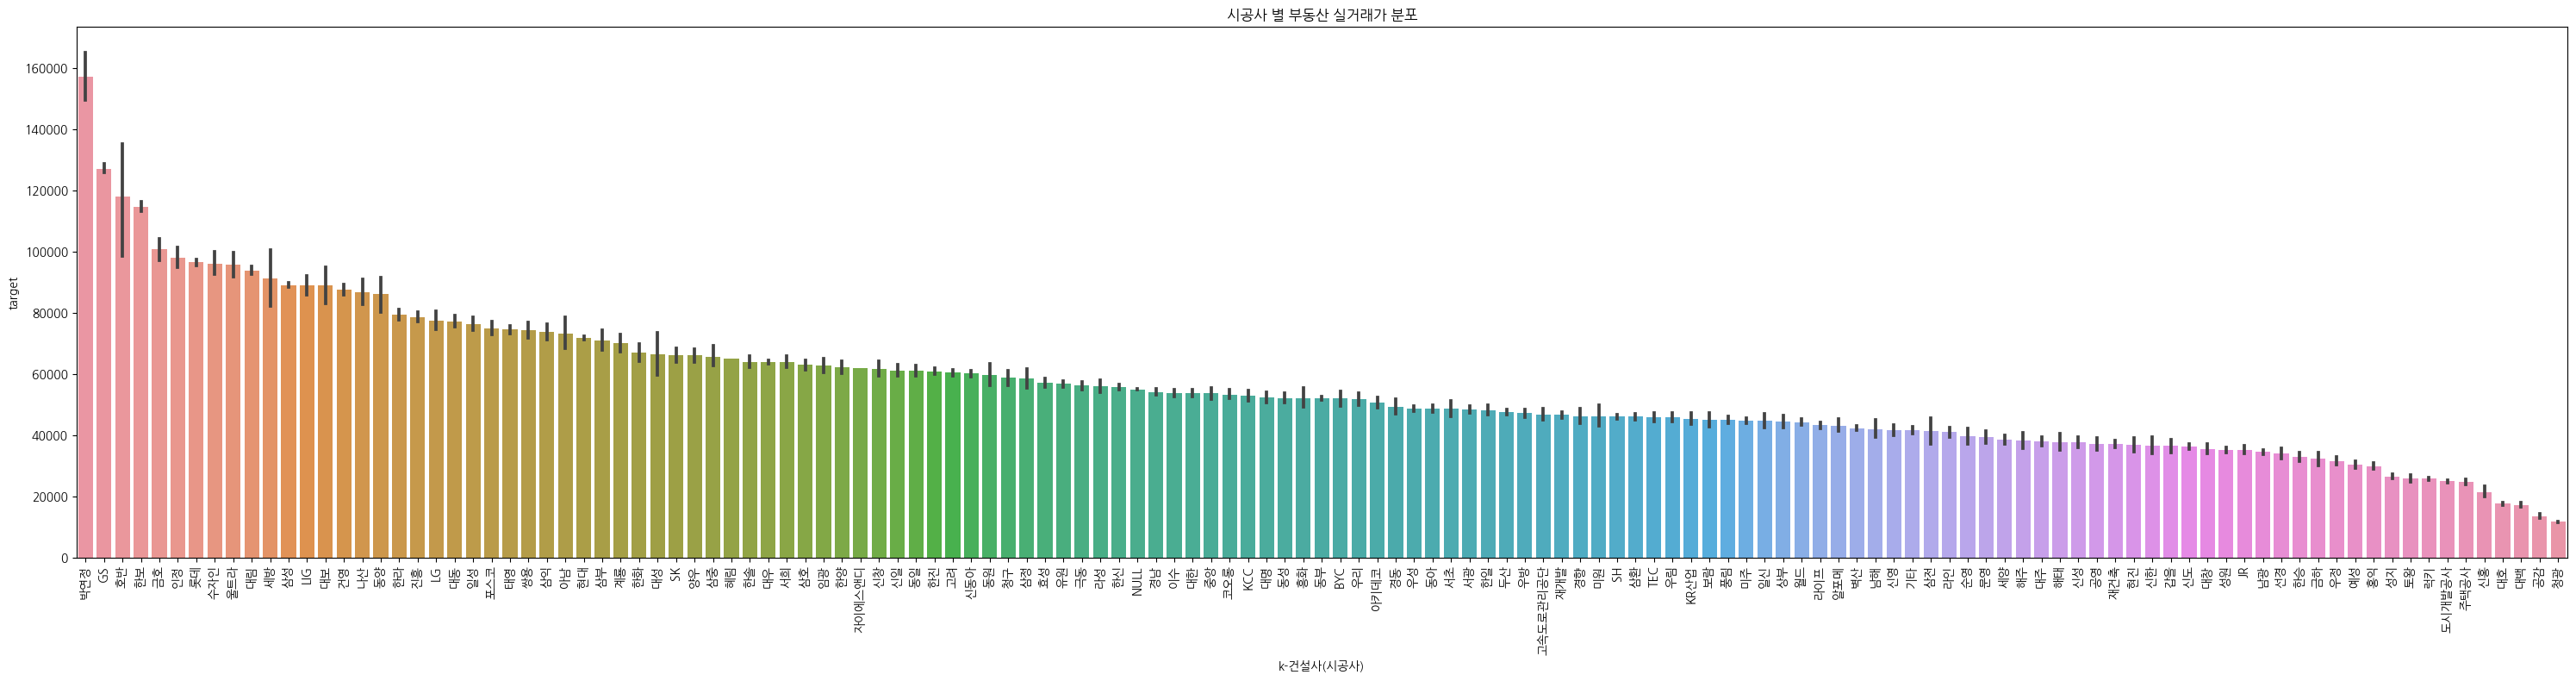

In [138]:
# 시각화 하기

plt.figure(figsize=(30, 8))
sns.barplot(x=df_temp['k-건설사(시공사)'], y=df_temp['target'], order=order.index)
plt.xticks(rotation=90)
plt.title('시공사 별 부동산 실거래가 분포')
plt.tight_layout()
plt.show()

In [139]:
# 시행사는 답이 없음

In [140]:
df_train['k-시행사'].isna().sum() / df_train.shape[0]

0.7787244083509263

In [141]:
word_list = df_train['k-시행사'].unique()
word_list = word_list.tolist()
display(word_list)

['모름',
 '우성건설',
 'LG건설',
 '대한주택공사',
 '대우건설',
 '동양고속건설주식회사',
 '경복아파트주택재건축정비사업조합',
 '삼성물산',
 '신해청재건축조합',
 nan,
 '우성2차리모델링주택조합',
 '프리즘(주)',
 '도곡주공재건축조합',
 '도곡동신아파트리모델링주택조합',
 '을지조합',
 '대치도곡제2아파트재건축조합',
 '한보',
 '도곡연합주택조합',
 '대성산업',
 '상아3차아파트주택재건축정비사업조합',
 '중앙건설',
 'SH공사',
 'sh공사',
 'sh 공사',
 '한국토지주택공사',
 'LH강남지역본부',
 '한라, 두진',
 '신사동 한영아파트 1지구 재건축조합',
 '삼성건설',
 '롯데건설',
 '영동1재건축조합',
 '개나리6차아파트주택재건축정비사업조합',
 '.',
 '(주)한화건설',
 '한신공영',
 '건영종합건설, 삼익주택,라이프주택',
 '청강연합주택조합',
 '청담삼익아파트',
 '현대산업개발',
 '청담 한양아파트 주택재건축사업조합',
 '현대건설(주)',
 '에스에이치공사',
 '서울주택도시공사',
 '남광토건, 대우',
 '청광종합건설(주)',
 '길동진흥아파트주택재건축정비사업조합',
 '청수연립재건축조합',
 '명일시영아파트 재건축조합',
 '고덕주공4단지주택재건축정비사업조합',
 '둔촌역지역주택조합',
 '삼호건설',
 '대농연립재건축조합',
 '샘하우징',
 '현대,대림',
 '(주)포유',
 '(주)디씨엠하우징',
 '생보부동산신탁',
 '미아제4구역재개발정비사업조합',
 '미아제10구역주택재개발조합',
 '미아1-2재개발조합',
 '미아10-1구역재개발조합',
 '양지연립주택조함',
 '건정종합건축사사무소',
 '번동한양아파트주택조합',
 '대한주택보증(주)',
 'SH도시개발공사',
 'SH 공사',
 '가양동 현대연합주택조합',
 '화이트코리아(주식회사)',
 '신명건설,신원건설,미주건설',
 'TEC건설',
 '화곡1주구재건축조합',
 '공군,유진 재건축주택조합',
 '청우

### k-사용검사일-사용승인일

In [142]:
df_train['k-사용검사일-사용승인일']

0          1987-11-21 00:00:00.0
1          1987-11-21 00:00:00.0
2          1987-11-21 00:00:00.0
3          1987-11-21 00:00:00.0
4          1987-11-21 00:00:00.0
                   ...          
1118817    1998-11-28 00:00:00.0
1118818    1998-11-28 00:00:00.0
1118819    1998-11-28 00:00:00.0
1118820    1998-11-28 00:00:00.0
1118821    1981-05-25 00:00:00.0
Name: k-사용검사일-사용승인일, Length: 1118822, dtype: object

In [143]:
df_train['k-사용검사일-사용승인일'].value_counts()

1992-11-18 00:00:00.0    3277
2008-09-30 00:00:00.0    3028
1990-09-06 00:00:00.0    2844
1982-06-04 00:00:00.0    2816
2005-12-28 00:00:00.0    2623
                         ... 
2020-09-24 00:00:00.0       1
2022-11-07 00:00:00.0       1
2023-01-27 00:00:00.0       1
2021-12-01 00:00:00.0       1
1994-12-07 00:00:00.0       1
Name: k-사용검사일-사용승인일, Length: 673, dtype: int64

In [144]:
df_train['k-사용검사일-사용승인일'].isna().sum() / df_train.shape[0]

0.7773318722728012

In [145]:
# 건축년도와의 관계 분석하기
df_temp = df_train[['k-사용검사일-사용승인일', '건축년도', 'target']].copy()

df_temp['사용검사연도'] = df_temp['k-사용검사일-사용승인일'].astype('str').map(lambda x: x[:4])
df_temp['사용검사월'] = df_temp['k-사용검사일-사용승인일'].astype('str').map(lambda x: x[5:7])
df_temp['사용검사일'] = df_temp['k-사용검사일-사용승인일'].astype('str').map(lambda x: x[8:10])

df_temp

,k-사용검사일-사용승인일,건축년도,target,사용검사연도,사용검사월,사용검사일
0,1987-11-21 00:00:00.0,1987,124000,1987,11,21
1,1987-11-21 00:00:00.0,1987,123500,1987,11,21
2,1987-11-21 00:00:00.0,1987,91500,1987,11,21
3,1987-11-21 00:00:00.0,1987,130000,1987,11,21
4,1987-11-21 00:00:00.0,1987,117000,1987,11,21
...,...,...,...,...,...,...
1118817,1998-11-28 00:00:00.0,1998,20000,1998,11,28
1118818,1998-11-28 00:00:00.0,1998,20000,1998,11,28
1118819,1998-11-28 00:00:00.0,1998,28000,1998,11,28
1118820,1998-11-28 00:00:00.0,1998,29000,1998,11,28


In [146]:
df_temp['건축년도'] = df_temp['건축년도'].astype('str')
df_temp.loc[df_temp['사용검사연도'] == 'nan', ['사용검사연도']] = np.nan

mask = (~df_temp['건축년도'].isnull()) & (~df_temp['사용검사연도'].isnull())
df_temp = df_temp[mask]
df_temp

,k-사용검사일-사용승인일,건축년도,target,사용검사연도,사용검사월,사용검사일
0,1987-11-21 00:00:00.0,1987,124000,1987,11,21
1,1987-11-21 00:00:00.0,1987,123500,1987,11,21
2,1987-11-21 00:00:00.0,1987,91500,1987,11,21
3,1987-11-21 00:00:00.0,1987,130000,1987,11,21
4,1987-11-21 00:00:00.0,1987,117000,1987,11,21
...,...,...,...,...,...,...
1118817,1998-11-28 00:00:00.0,1998,20000,1998,11,28
1118818,1998-11-28 00:00:00.0,1998,20000,1998,11,28
1118819,1998-11-28 00:00:00.0,1998,28000,1998,11,28
1118820,1998-11-28 00:00:00.0,1998,29000,1998,11,28


In [147]:
df_temp['건축년도_사용검사연도_동일여부'] = np.where((df_temp['건축년도'] == df_temp['사용검사연도']), True, False)
df_temp

,k-사용검사일-사용승인일,건축년도,target,사용검사연도,사용검사월,사용검사일,건축년도_사용검사연도_동일여부
0,1987-11-21 00:00:00.0,1987,124000,1987,11,21,True
1,1987-11-21 00:00:00.0,1987,123500,1987,11,21,True
2,1987-11-21 00:00:00.0,1987,91500,1987,11,21,True
3,1987-11-21 00:00:00.0,1987,130000,1987,11,21,True
4,1987-11-21 00:00:00.0,1987,117000,1987,11,21,True
...,...,...,...,...,...,...,...
1118817,1998-11-28 00:00:00.0,1998,20000,1998,11,28,True
1118818,1998-11-28 00:00:00.0,1998,20000,1998,11,28,True
1118819,1998-11-28 00:00:00.0,1998,28000,1998,11,28,True
1118820,1998-11-28 00:00:00.0,1998,29000,1998,11,28,True


In [148]:
df_temp['건축년도_사용검사연도_동일여부'].value_counts()

True     248237
False       889
Name: 건축년도_사용검사연도_동일여부, dtype: int64

In [149]:
# +- 2년의 경우에도 같다고 적용한다면?
df_temp['건축년도_사용검사연도_동일여부'] = np.where((abs(df_temp['건축년도'].astype('int') - df_temp['사용검사연도'].astype('int')) <= 2), True, False)
df_temp

,k-사용검사일-사용승인일,건축년도,target,사용검사연도,사용검사월,사용검사일,건축년도_사용검사연도_동일여부
0,1987-11-21 00:00:00.0,1987,124000,1987,11,21,True
1,1987-11-21 00:00:00.0,1987,123500,1987,11,21,True
2,1987-11-21 00:00:00.0,1987,91500,1987,11,21,True
3,1987-11-21 00:00:00.0,1987,130000,1987,11,21,True
4,1987-11-21 00:00:00.0,1987,117000,1987,11,21,True
...,...,...,...,...,...,...,...
1118817,1998-11-28 00:00:00.0,1998,20000,1998,11,28,True
1118818,1998-11-28 00:00:00.0,1998,20000,1998,11,28,True
1118819,1998-11-28 00:00:00.0,1998,28000,1998,11,28,True
1118820,1998-11-28 00:00:00.0,1998,29000,1998,11,28,True


In [150]:
df_temp['건축년도_사용검사연도_동일여부'].value_counts()

True     248830
False       296
Name: 건축년도_사용검사연도_동일여부, dtype: int64

### k-연면적

In [151]:
df_train['k-연면적']

0          22637.0
1          22637.0
2          22637.0
3          22637.0
4          22637.0
            ...   
1118817    45515.0
1118818    45515.0
1118819    45515.0
1118820    45515.0
1118821     7354.0
Name: k-연면적, Length: 1118822, dtype: float64

In [152]:
df_train['k-연면적'].isna().sum() / df_train.shape[0]

0.7772129972417418

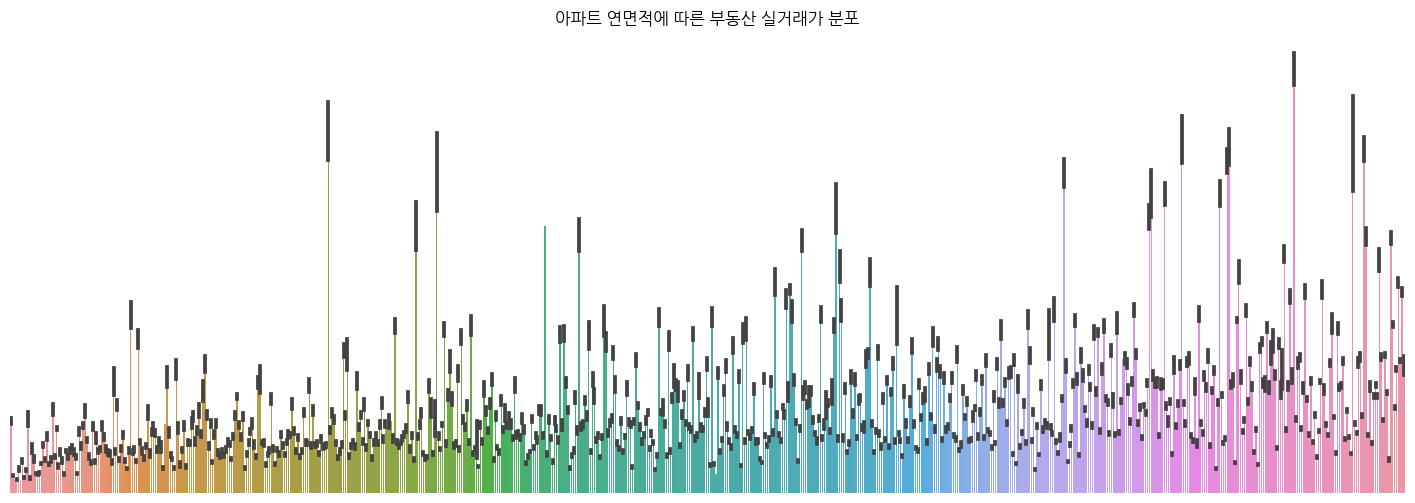

In [153]:
df_temp = df_train[['k-연면적', 'target']].copy()

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp['k-연면적'], y=df_temp['target'])
plt.gca().set_axis_off()
plt.title('아파트 연면적에 따른 부동산 실거래가 분포')
plt.show()

### k-주거전용면적

In [154]:
df_train['k-주거전용면적'].isna().sum() / df_train.shape[0]

0.7772532181169123

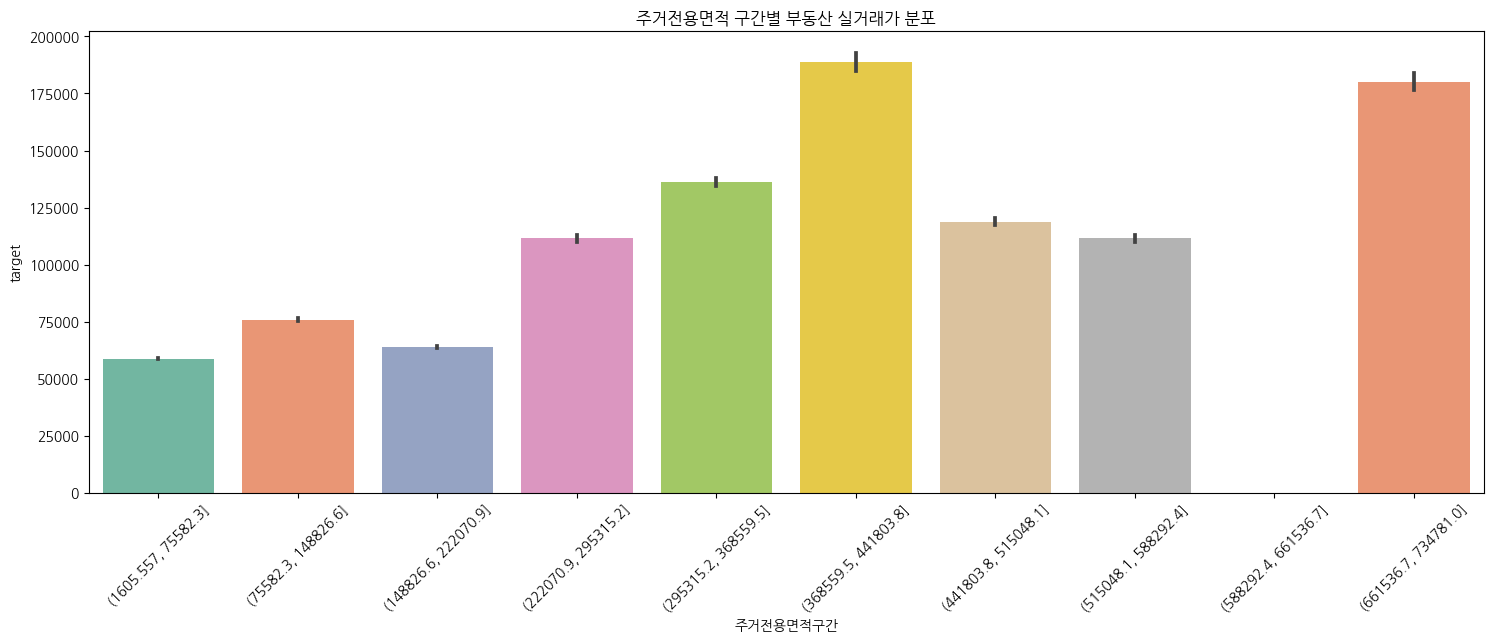

In [155]:
df_temp = df_train[['k-주거전용면적', 'target']].copy()
df_temp['주거전용면적구간'] = pd.cut(df_temp['k-주거전용면적'], bins=10)

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp['주거전용면적구간'], y=df_temp['target'], palette='Set2')
plt.xticks(rotation=45)
plt.title('주거전용면적 구간별 부동산 실거래가 분포')
plt.show()

### k-관리비부과면적

In [156]:
df_train['k-관리비부과면적'].isna().sum() / df_train.shape[0]

0.7772129972417418

### k-전용면적별세대현황

In [157]:
df_train['k-전용면적별세대현황(60㎡이하)']

0           20.0
1           20.0
2           20.0
3           20.0
4           20.0
           ...  
1118817    171.0
1118818    171.0
1118819    171.0
1118820    171.0
1118821    121.0
Name: k-전용면적별세대현황(60㎡이하), Length: 1118822, dtype: float64

In [158]:
df_train['k-전용면적별세대현황(60㎡이하)'].isna().sum() / df_train.shape[0]

0.7772532181169123

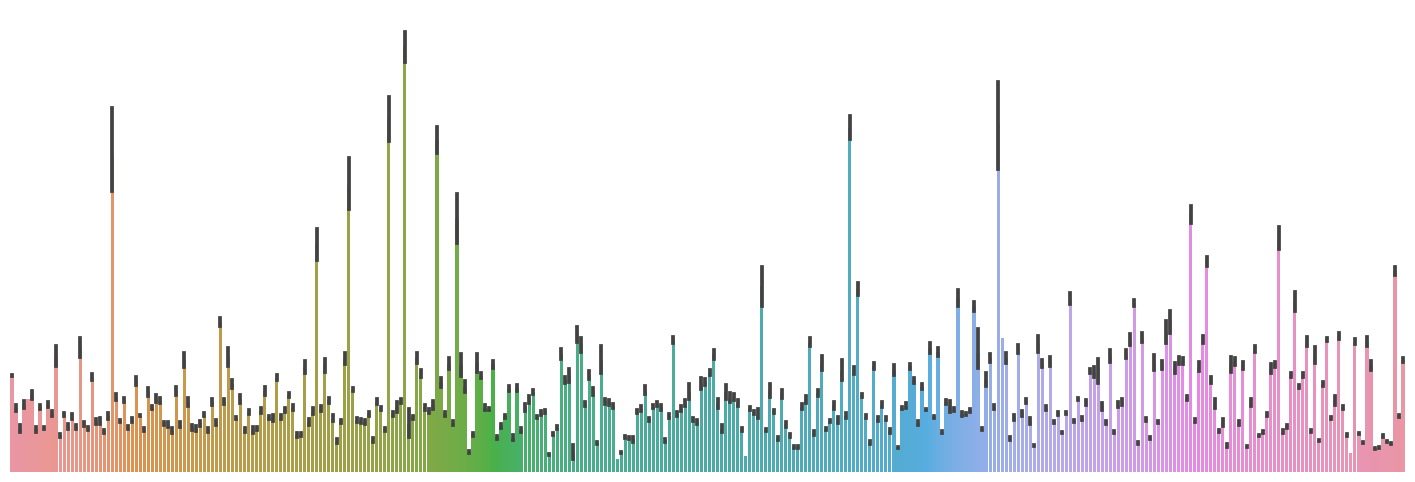

In [159]:
df_temp = df_train[['k-전용면적별세대현황(60㎡이하)', 'target']].copy()
df_temp_sorted = df_temp.sort_values(by='k-전용면적별세대현황(60㎡이하)')

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp_sorted['k-전용면적별세대현황(60㎡이하)'], y=df_temp_sorted['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('')
plt.show()

In [160]:
df_train['k-전용면적별세대현황(60㎡~85㎡이하)'].isna().sum() / df_train.shape[0]

0.7772532181169123

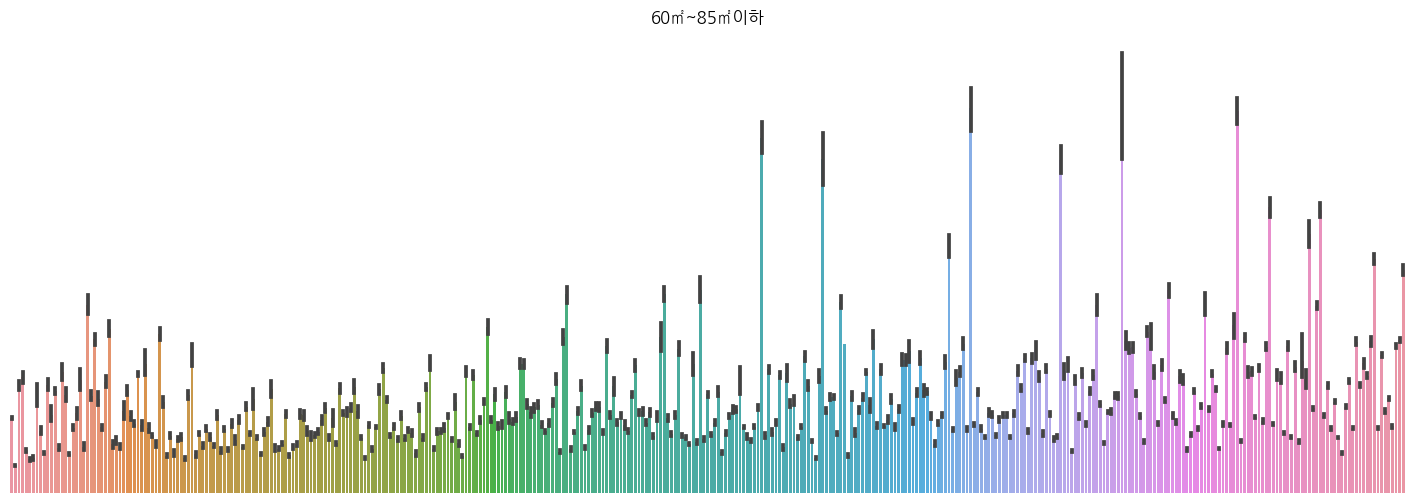

In [161]:
df_temp = df_train[['k-전용면적별세대현황(60㎡~85㎡이하)', 'target']].copy()
plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp['k-전용면적별세대현황(60㎡~85㎡이하)'], y=df_temp['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('60㎡~85㎡이하')
plt.show()

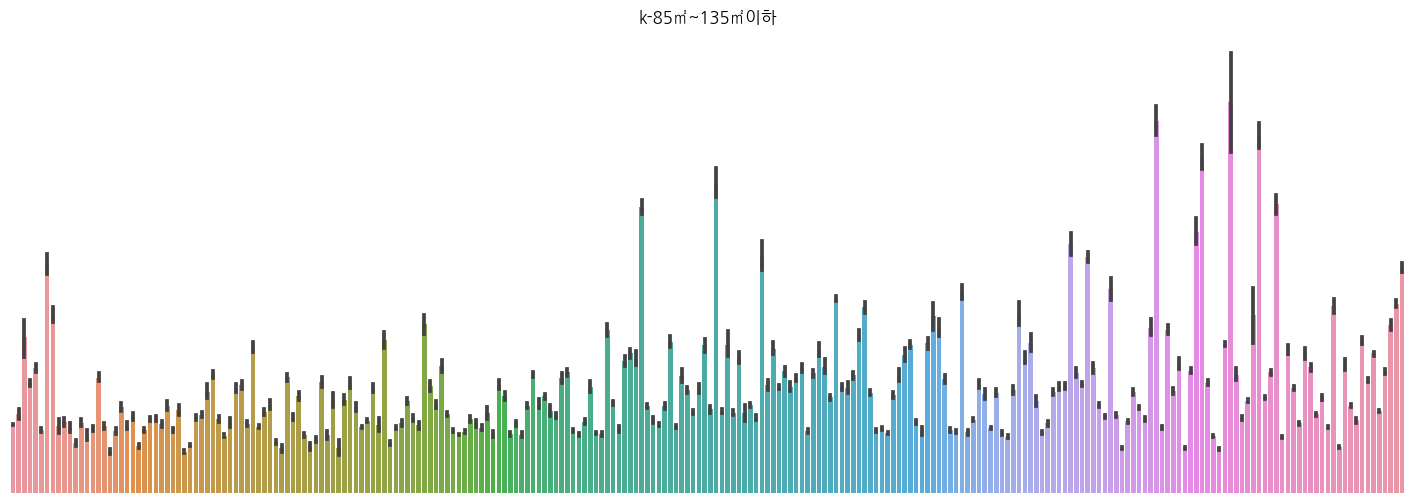

In [162]:
df_temp = df_train[['k-85㎡~135㎡이하', 'target']].copy()
df_temp_sorted = df_temp.sort_values(by='k-85㎡~135㎡이하')

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp_sorted['k-85㎡~135㎡이하'], y=df_temp_sorted['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('k-85㎡~135㎡이하')
plt.show()

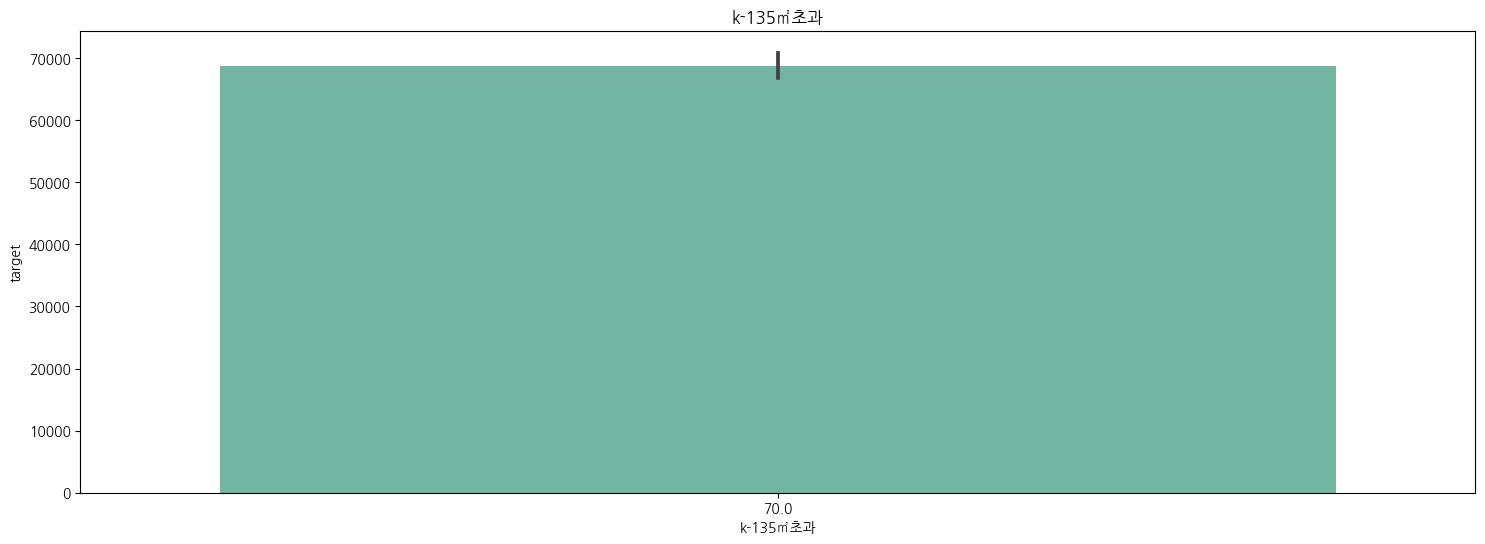

In [163]:
df_temp = df_train[['k-135㎡초과', 'target']].copy()
df_temp_sorted = df_temp.sort_values(by='k-135㎡초과')

plt.figure(figsize=(18, 6))
sns.barplot(x=df_temp_sorted['k-135㎡초과'], y=df_temp_sorted['target'], palette='Set2')
# plt.xticks(rotation=45)
plt.title('k-135㎡초과')
plt.show()

In [164]:
df_temp.value_counts()

k-135㎡초과  target
70.0      62500     12
          70000     12
          58000     11
          67000      9
          62000      9
                    ..
          61800      1
          61300      1
          60800      1
          60700      1
          169304     1
Length: 149, dtype: int64

In [165]:
df_temp = df_train[['k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'target']].copy()
df_temp

,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,target
0,20.0,250.0,0.0,NaN,124000
1,20.0,250.0,0.0,NaN,123500
2,20.0,250.0,0.0,NaN,91500
3,20.0,250.0,0.0,NaN,130000
4,20.0,250.0,0.0,NaN,117000
...,...,...,...,...,...
1118817,171.0,141.0,54.0,NaN,20000
1118818,171.0,141.0,54.0,NaN,20000
1118819,171.0,141.0,54.0,NaN,28000
1118820,171.0,141.0,54.0,NaN,29000


In [166]:
# 전체 세대 중 60 이하의 비율, 60~85 의 비율, 85~135의 비율, 135 이상의 비율을 나타내는 column을 만들어서 확인해보자.
# 결측치는 0으로써 판단하자.

df_temp['세대합계'] = df_temp[['k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과']].sum(axis=1, skipna=True)
df_temp['세대합계']


0          270.0
1          270.0
2          270.0
3          270.0
4          270.0
           ...  
1118817    366.0
1118818    366.0
1118819    366.0
1118820    366.0
1118821    122.0
Name: 세대합계, Length: 1118822, dtype: float64

In [167]:
df_temp['~60'] = round(df_temp['k-전용면적별세대현황(60㎡이하)'] / df_temp['세대합계'] * 100, 3)
df_temp['~60']

0           7.407
1           7.407
2           7.407
3           7.407
4           7.407
            ...  
1118817    46.721
1118818    46.721
1118819    46.721
1118820    46.721
1118821    99.180
Name: ~60, Length: 1118822, dtype: float64

In [168]:
df_temp['60~80'] = round(df_temp['k-전용면적별세대현황(60㎡~85㎡이하)'] / df_temp['세대합계'] * 100, 3)
df_temp['60~80']

0          92.593
1          92.593
2          92.593
3          92.593
4          92.593
            ...  
1118817    38.525
1118818    38.525
1118819    38.525
1118820    38.525
1118821     0.000
Name: 60~80, Length: 1118822, dtype: float64

In [169]:
df_temp['80~135'] = round(df_temp['k-85㎡~135㎡이하'] / df_temp['세대합계'] * 100, 3)
df_temp['80~135']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
            ...  
1118817    14.754
1118818    14.754
1118819    14.754
1118820    14.754
1118821     0.820
Name: 80~135, Length: 1118822, dtype: float64

In [170]:
df_temp['135~'] = round(df_temp['k-135㎡초과'] / df_temp['세대합계'] * 100, 3)
df_temp['135~']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1118817   NaN
1118818   NaN
1118819   NaN
1118820   NaN
1118821   NaN
Name: 135~, Length: 1118822, dtype: float64

In [171]:
df_temp.loc[df_temp['135~'].isna(), ['135~']] = 0

In [172]:
df_temp

,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,target,세대합계,~60,60~80,80~135,135~
0,20.0,250.0,0.0,NaN,124000,270.0,7.407,92.593,0.000,0.0
1,20.0,250.0,0.0,NaN,123500,270.0,7.407,92.593,0.000,0.0
2,20.0,250.0,0.0,NaN,91500,270.0,7.407,92.593,0.000,0.0
3,20.0,250.0,0.0,NaN,130000,270.0,7.407,92.593,0.000,0.0
4,20.0,250.0,0.0,NaN,117000,270.0,7.407,92.593,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
1118817,171.0,141.0,54.0,NaN,20000,366.0,46.721,38.525,14.754,0.0
1118818,171.0,141.0,54.0,NaN,20000,366.0,46.721,38.525,14.754,0.0
1118819,171.0,141.0,54.0,NaN,28000,366.0,46.721,38.525,14.754,0.0
1118820,171.0,141.0,54.0,NaN,29000,366.0,46.721,38.525,14.754,0.0


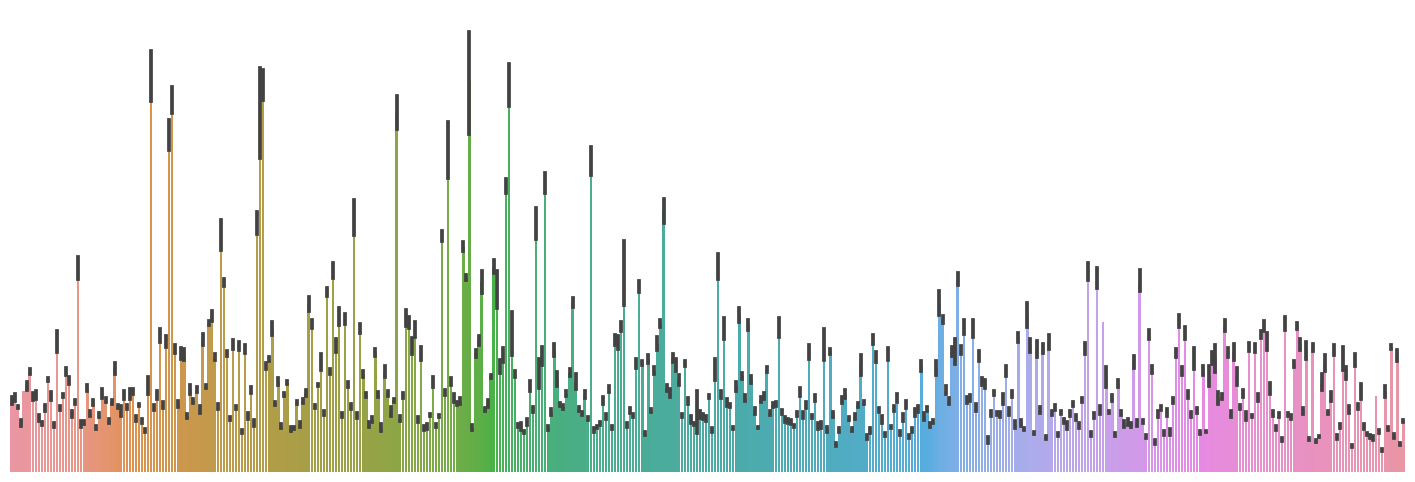

56730.65351955517


In [173]:
plt.figure(figsize=(18, 6))
df_temp_sorted = df_temp.sort_values(by='~60')
df_temp_filtered = df_temp_sorted[df_temp_sorted['~60'] != 0]
sns.barplot(x=df_temp_filtered['~60'], y=df_temp_filtered['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('')
plt.show()

print(df_temp_filtered['target'].mean())

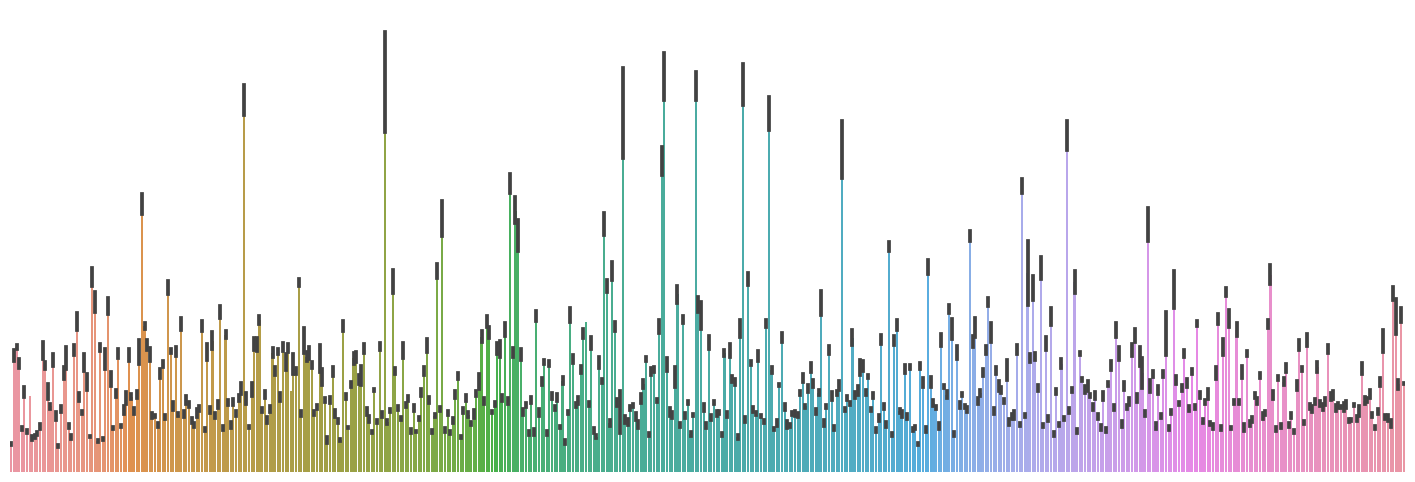

58044.40370395124


In [174]:
plt.figure(figsize=(18, 6))
df_temp_sorted = df_temp.sort_values(by='60~80')
df_temp_filtered = df_temp_sorted[df_temp_sorted['60~80'] != 0]
sns.barplot(x=df_temp_filtered['60~80'], y=df_temp_filtered['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('')
plt.show()
print(df_temp_filtered['target'].mean())

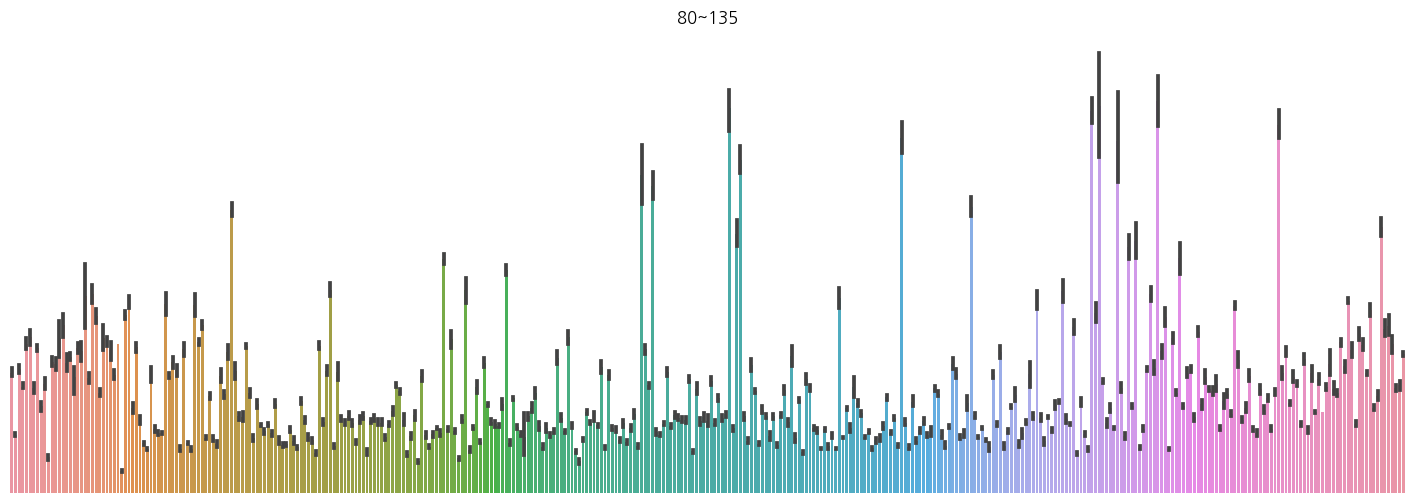

58463.736739707994


In [175]:
plt.figure(figsize=(18, 6))
df_temp_sorted = df_temp.sort_values(by='80~135')
df_temp_filtered = df_temp_sorted[df_temp_sorted['80~135'] != 0]
sns.barplot(x=df_temp_filtered['80~135'], y=df_temp_filtered['target'])
# plt.xticks(rotation=45)
plt.gca().set_axis_off()
plt.title('80~135')
plt.show()
print(df_temp_filtered['target'].mean())

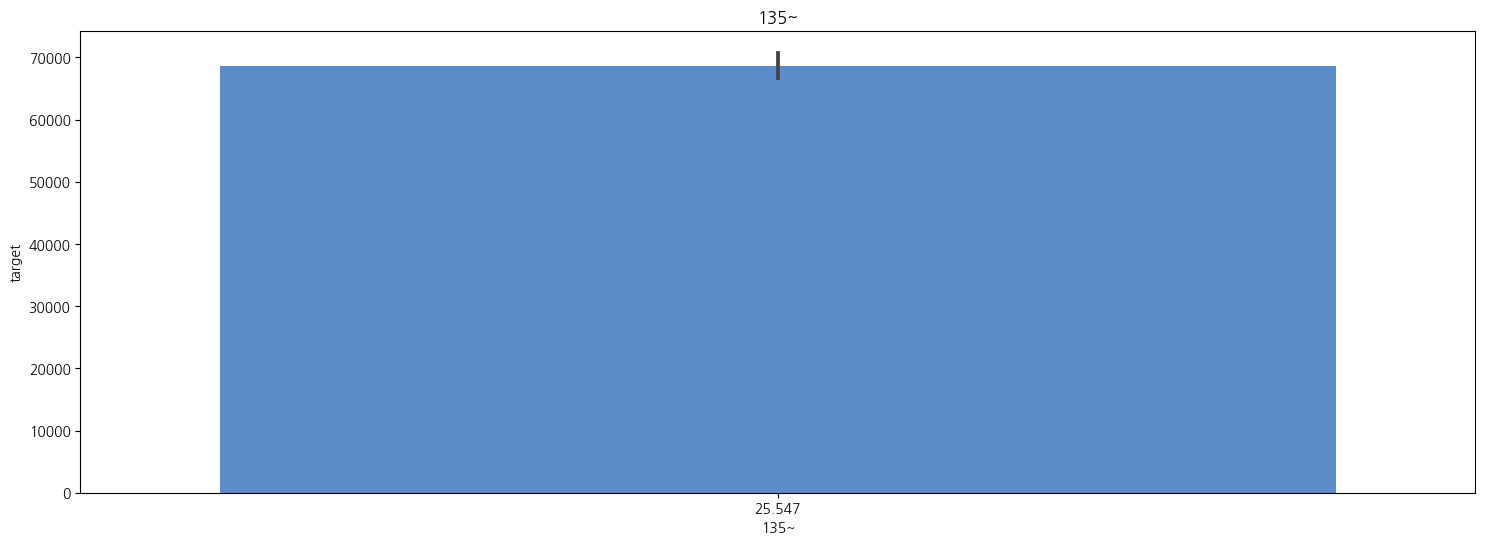

68647.3119266055


In [176]:
plt.figure(figsize=(18, 6))
df_temp_sorted = df_temp.sort_values(by='135~')
df_temp_filtered = df_temp_sorted[df_temp_sorted['135~'] != 0]
sns.barplot(x=df_temp_filtered['135~'], y=df_temp_filtered['target'], color='#4B89DC')
plt.title('135~')
plt.show()
print(df_temp_filtered['target'].mean())

### k-홈페이지

In [177]:
df_train['k-홈페이지'].isna().sum() / df_train.shape[0]

0.8988444989462131

In [178]:
df_train['k-홈페이지'].value_counts()

없음                                                        3606
www.jsls.co.kr                                            3028
gaepo001@naver.com                                        2816
www.oftapt.com                                            2589
성산시영.apt.co.kr                                            2360
                                                          ... 
www. 자양12구역지역재개발조합                                           6
bbgran.xisad.co.kr                                           6
cafe.naver.com                                               3
thesharp-trieh.hthomeservice.com/#/feeManage?_k=vm58ep       1
http://www.i-sh.co.kr/happy/intro.do                         1
Name: k-홈페이지, Length: 221, dtype: int64

### k-등록일자

In [179]:
df_train['k-등록일자'].isna().sum() / df_train.shape[0]

0.9901771684861399

In [180]:
df_train['k-등록일자'].value_counts()

2017-02-01 10:49:21.0    1857
2017-02-10 12:21:22.0     710
2019-01-03 07:03:23.0     484
2017-04-18 02:58:24.0     306
2017-09-06 06:35:46.0     216
                         ... 
2022-01-05 18:02:23.0       1
2022-08-04 21:04:18.0       1
2022-12-06 02:25:40.0       1
2023-02-18 07:24:46.0       1
2020-12-31 22:40:22.0       1
Name: k-등록일자, Length: 126, dtype: int64

### k-수정일자

In [181]:
df_train['k-수정일자'].isna().sum() / df_train.shape[0]

0.7772532181169123

In [182]:
df_train['k-수정일자'].value_counts()

2023-09-20 21:38:55.0    3028
2020-02-17 06:10:24.0    2816
2023-09-20 22:10:18.0    2589
2023-09-23 17:49:17.0    2562
2023-09-25 09:18:00.0    2465
                         ... 
2023-09-23 17:23:08.0       1
2023-09-23 08:21:37.0       1
2023-09-25 17:08:03.0       1
2023-09-25 16:31:18.0       1
2023-09-25 07:49:22.0       1
Name: k-수정일자, Length: 743, dtype: int64

### 고용보험관리번호

In [183]:
df_train['고용보험관리번호'].isna().sum() / df_train.shape[0]

0.8163085817046858

In [184]:
df_train['고용보험관리번호'].value_counts()

909-01-23103-1    3028
21380014370       2816
908-00-99517-1    2562
907-009-67911     2465
907-00-16928-1    2360
                  ... 
92023031541         21
918-15-59912-1      14
91919837281         14
206-82-61203-0       3
21780016330          1
Name: 고용보험관리번호, Length: 526, dtype: int64

### 경비비관리형태

In [185]:
df_train['경비비관리형태'].isna().sum() / df_train.shape[0]

0.7784866582888074

In [186]:
df_train['경비비관리형태'].value_counts()

위탁       206401
직영        33526
위탁+직영      6108
기타         1799
Name: 경비비관리형태, dtype: int64

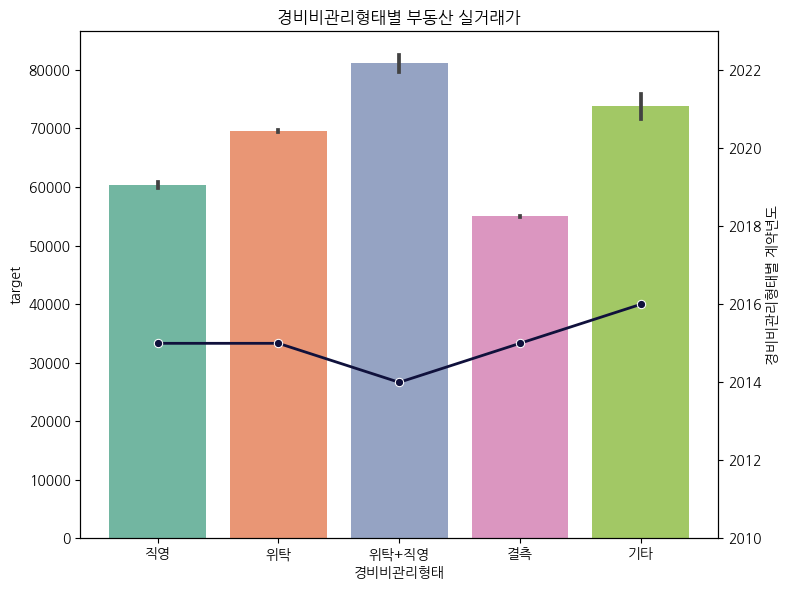

In [187]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['경비비관리형태','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['경비비관리형태'].isna(), ['경비비관리형태']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['경비비관리형태'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('경비비관리형태별 부동산 실거래가')
ax1.set_xlabel('경비비관리형태')


mean_year = []
values = df_temp['경비비관리형태'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['경비비관리형태'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('경비비관리형태별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 세대전기계약방법

In [188]:
df_train['세대전기계약방법'].isna().sum() / df_train.shape[0]

0.7854216309654262

In [189]:
df_train['세대전기계약방법'].value_counts()

종합계약    122973
단일계약    117102
Name: 세대전기계약방법, dtype: int64

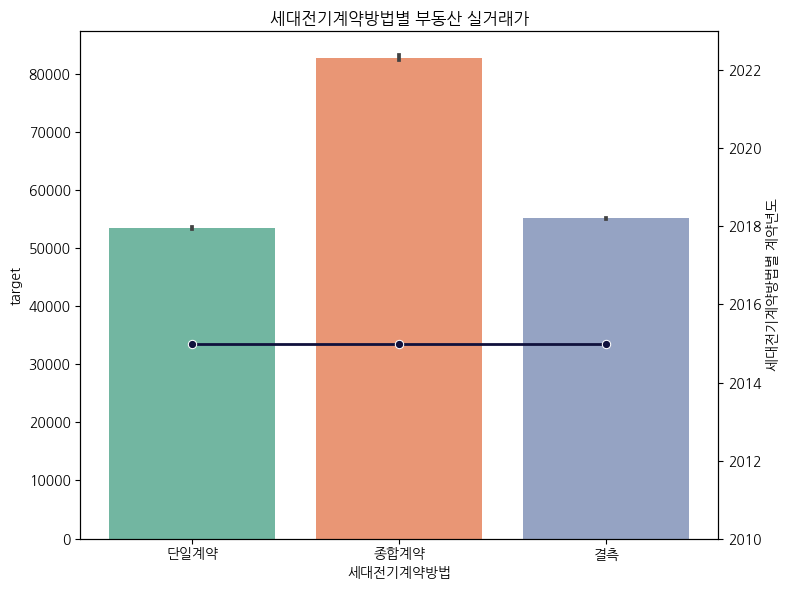

In [190]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['세대전기계약방법','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['세대전기계약방법'].isna(), ['세대전기계약방법']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['세대전기계약방법'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('세대전기계약방법별 부동산 실거래가')
ax1.set_xlabel('세대전기계약방법')


mean_year = []
values = df_temp['세대전기계약방법'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['세대전기계약방법'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('세대전기계약방법별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 청소비관리형태

In [191]:
df_train['청소비관리형태'].isna().sum() / df_train.shape[0]

0.7786564797617495

In [192]:
df_train['청소비관리형태'].value_counts()

위탁       225016
직영        15052
위탁+직영      4127
기타         3449
Name: 청소비관리형태, dtype: int64

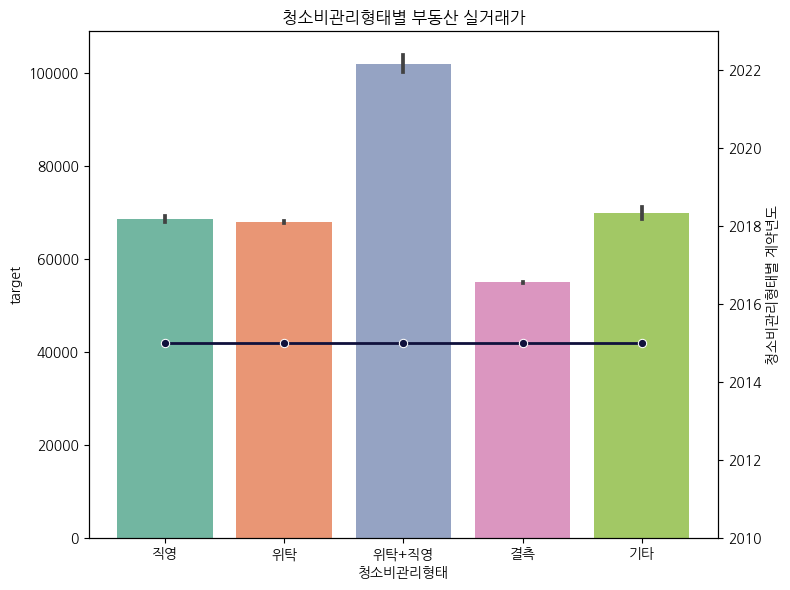

In [193]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['청소비관리형태','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['청소비관리형태'].isna(), ['청소비관리형태']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['청소비관리형태'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('청소비관리형태별 부동산 실거래가')
ax1.set_xlabel('청소비관리형태')


mean_year = []
values = df_temp['청소비관리형태'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['청소비관리형태'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('청소비관리형태별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 건축면적

In [194]:
df_train['건축면적'].isna().sum() / df_train.shape[0]

0.7773479606228694

In [195]:
df_train['건축면적'].value_counts()

0.00         117399
49266.41       2589
172371.00      2465
25737.00       2346
20457.82       2187
              ...  
6329.59           1
2309.45           1
2724.46           1
1044.15           1
2909.14           1
Name: 건축면적, Length: 455, dtype: int64

In [196]:
df_temp

,청소비관리형태,계약년월,target,계약년도
0,직영,201712,124000,2017
1,직영,201712,123500,2017
2,직영,201712,91500,2017
3,직영,201801,130000,2018
4,직영,201801,117000,2018
...,...,...,...,...
1118817,위탁,200707,20000,2007
1118818,위탁,200708,20000,2007
1118819,위탁,200708,28000,2007
1118820,위탁,200709,29000,2007


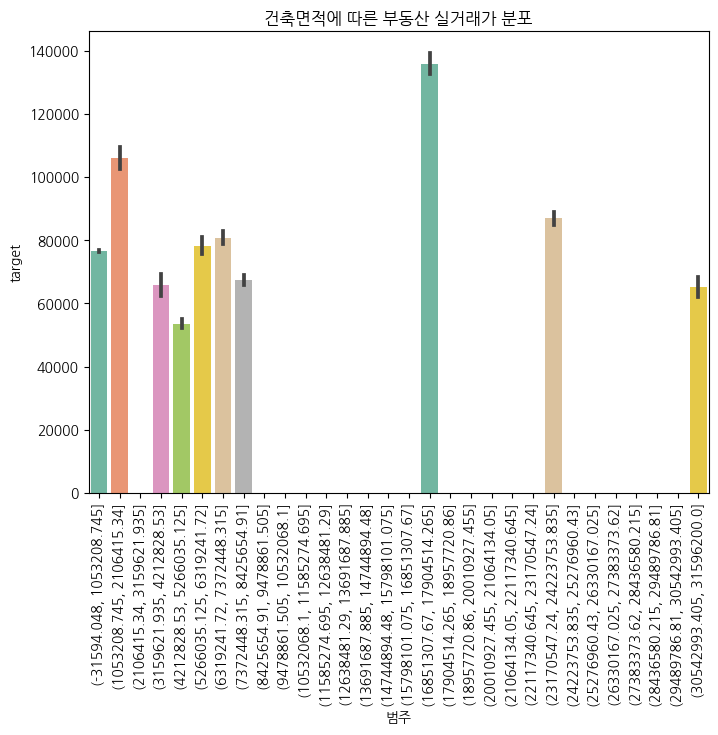

target    55508.684378
dtype: float64


In [197]:
# 0을 결측치로 봤을 때
df_temp = df_train[['건축면적', 'target']].copy()
df_temp.loc[df_temp['건축면적'] == 0, ['건축면적']] = np.nan

df_temp['범주'] = pd.cut(df_temp['건축면적'], bins=30)

plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['범주'], y=df_temp['target'], palette='Set2')
plt.xticks(rotation=90)
plt.title('건축면적에 따른 부동산 실거래가 분포')
plt.show()

print(df_temp.loc[df_temp['건축면적'].isna(),['target']].mean())


In [198]:
df_temp = df_train[['건축면적', 'target']].copy()
print(df_temp.loc[df_temp['건축면적'].isna(),['target']].mean())
print(df_temp.loc[df_temp['건축면적'] == 0,['target']].mean())

target    54984.88588
dtype: float64
target    59389.082735
dtype: float64


### 주차대수

In [199]:
df_train['주차대수'].isna().sum() / df_train.shape[0]

0.7773479606228694

In [200]:
df_train['주차대수'].value_counts()

0.0       17945
2.0        3413
1.0        2852
4245.0     2589
3021.0     2562
          ...  
657.0         2
305.0         1
984.0         1
287.0         1
363.0         1
Name: 주차대수, Length: 526, dtype: int64

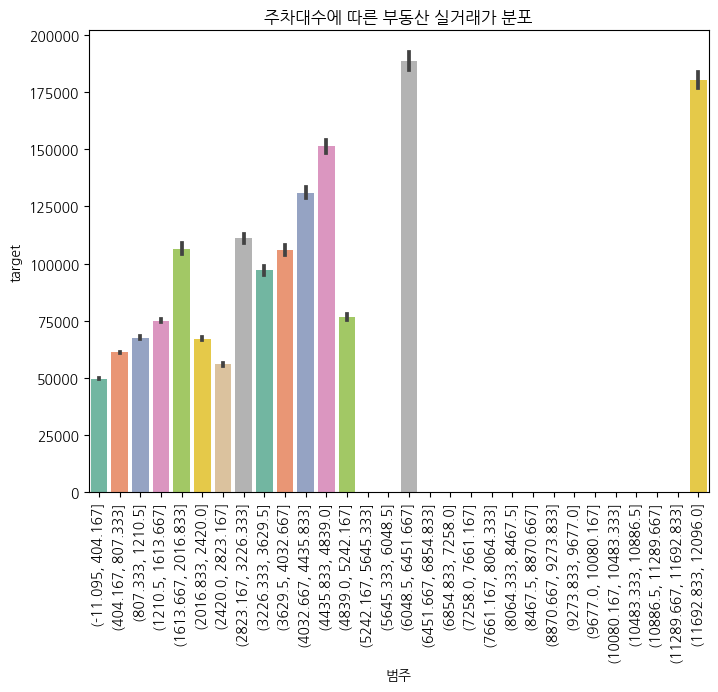

In [201]:
# 0을 결측치로 봤을 때
df_temp = df_train[['주차대수', 'target']].copy()
df_temp.loc[df_temp['주차대수'] == 0, ['주차대수']] = np.nan

df_temp['범주'] = pd.cut(df_temp['주차대수'], bins=30)

plt.figure(figsize=(8, 6))
sns.barplot(x=df_temp['범주'], y=df_temp['target'], palette='Set2')
plt.xticks(rotation=90)
plt.title('주차대수에 따른 부동산 실거래가 분포')
plt.show()

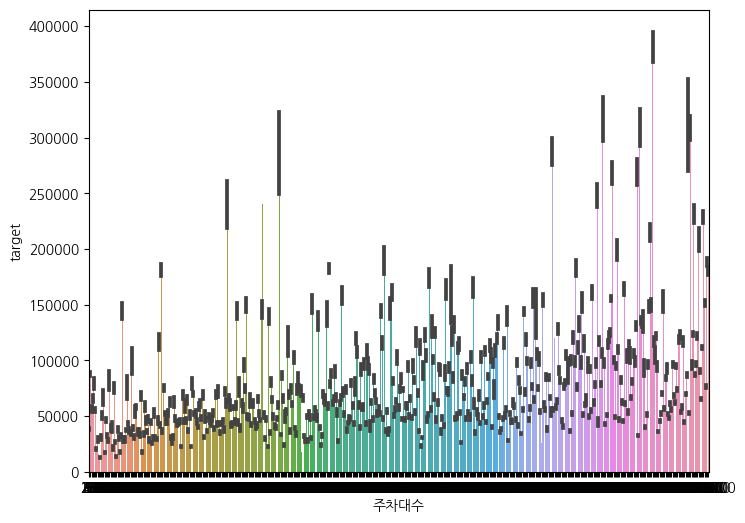

In [202]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df_temp['주차대수'], y=df_temp['target'])
# plt.xticks(rotation=45)
plt.title('')
plt.show()

In [203]:
df_temp = df_train[['주차대수', 'target']].copy()
print(df_temp.loc[df_temp['주차대수'].isna(),['target']].mean())
print(df_temp.loc[df_temp['주차대수'] == 0,['target']].mean())

target    54984.88588
dtype: float64
target    72870.650766
dtype: float64


### 기타/의무/임대/임의=1/2/3/4

In [204]:
df_train['기타/의무/임대/임의=1/2/3/4'].isna().sum() / df_train.shape[0]

0.7772129972417418

In [205]:
df_train['기타/의무/임대/임의=1/2/3/4'].value_counts()

의무    239198
기타      4177
임의      3682
임대      2202
Name: 기타/의무/임대/임의=1/2/3/4, dtype: int64

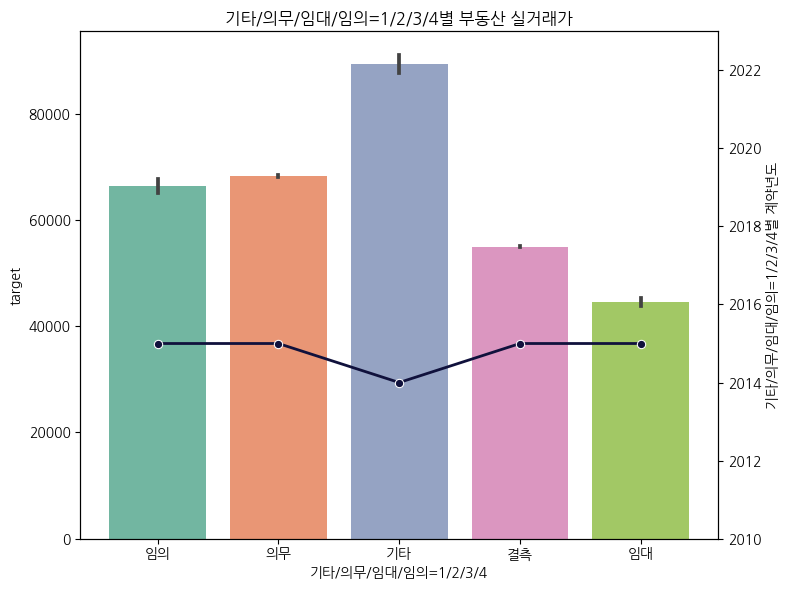

In [206]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['기타/의무/임대/임의=1/2/3/4','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['기타/의무/임대/임의=1/2/3/4'].isna(), ['기타/의무/임대/임의=1/2/3/4']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['기타/의무/임대/임의=1/2/3/4'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('기타/의무/임대/임의=1/2/3/4별 부동산 실거래가')
ax1.set_xlabel('기타/의무/임대/임의=1/2/3/4')


mean_year = []
values = df_temp['기타/의무/임대/임의=1/2/3/4'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['기타/의무/임대/임의=1/2/3/4'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('기타/의무/임대/임의=1/2/3/4별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 단지승인일

In [207]:
df_train['단지승인일'].isna().sum() / df_train.shape[0]

0.7778592126361477

In [208]:
df_train['단지승인일'].value_counts()

2013-06-23 12:47:34.0    3028
2013-06-23 14:21:02.0    2816
2015-01-12 11:06:54.0    2589
2017-04-12 17:26:04.0    2562
2019-01-03 16:13:52.0    2465
                         ... 
2021-01-06 09:06:12.0       1
2022-12-12 12:50:50.0       1
2023-04-27 13:23:51.0       1
2022-02-23 13:01:10.0       1
2016-05-27 17:03:25.0       1
Name: 단지승인일, Length: 735, dtype: int64

### 사용허가여부

In [209]:
df_train['사용허가여부'].isna().sum() / df_train.shape[0]

0.7772129972417418

In [210]:
df_train['사용허가여부'].value_counts()

Y    249259
Name: 사용허가여부, dtype: int64

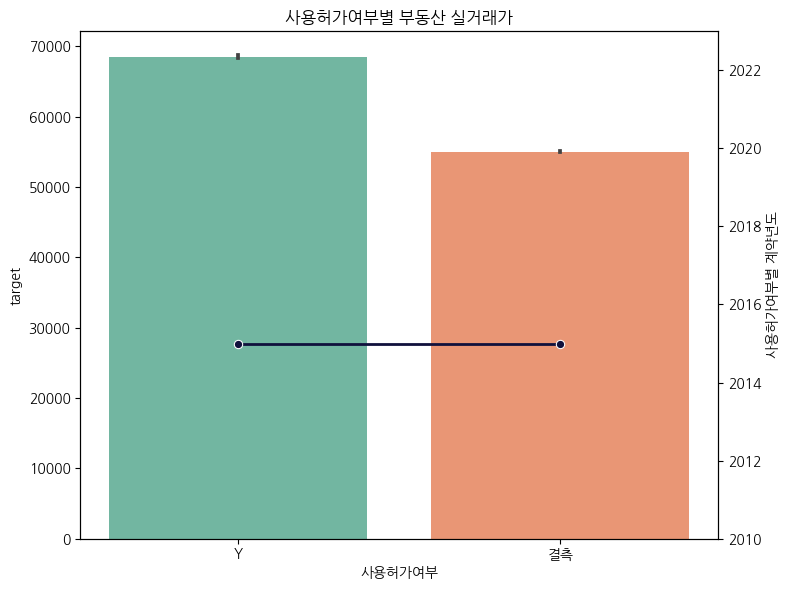

In [211]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['사용허가여부','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['사용허가여부'].isna(), ['사용허가여부']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['사용허가여부'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('사용허가여부별 부동산 실거래가')
ax1.set_xlabel('사용허가여부')


mean_year = []
values = df_temp['사용허가여부'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['사용허가여부'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('사용허가여부별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 관리비 업로드

In [212]:
df_train['관리비 업로드'].isna().sum() / df_train.shape[0]

0.7772129972417418

In [213]:
df_train['관리비 업로드'].value_counts()

N    245117
Y      4142
Name: 관리비 업로드, dtype: int64

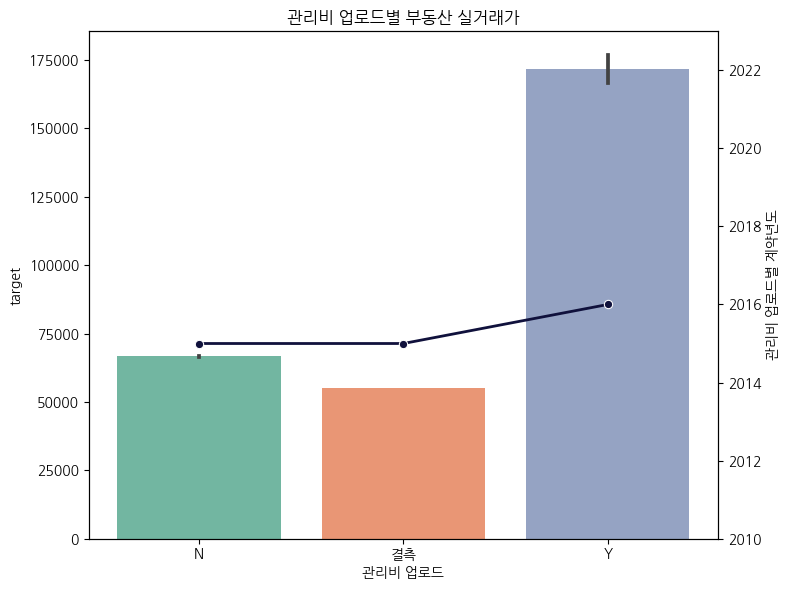

In [214]:
# 각 유형별로 target 분포 확인하기
df_temp = df_train[['관리비 업로드','계약년월', 'target']].copy()
df_temp['계약년도'] = df_temp['계약년월'].astype('str').map(lambda x: x[:4])
df_temp.loc[df_temp['관리비 업로드'].isna(), ['관리비 업로드']] = '결측'

fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_temp['관리비 업로드'], y=df_temp['target'], palette='Set2', ax=ax1)
ax1.set_title('관리비 업로드별 부동산 실거래가')
ax1.set_xlabel('관리비 업로드')


mean_year = []
values = df_temp['관리비 업로드'].value_counts()
for value in values.index:
    mean = df_temp[df_temp['관리비 업로드'] == value].loc[:, '계약년도'].astype('int').mean()
    mean_year.append(round(mean))

ax2 = ax1.twinx()
ax2.set_ylabel('관리비 업로드별 계약년도')
ax2.set_ylim(2010, 2023)
sns.lineplot(x=values.index, y=mean_year, marker='o', 
             color='#10113C', linestyle='-', linewidth=2, ax=ax2)

fig.tight_layout()
plt.show()

### 단지신청일

In [215]:
df_train['단지신청일'].isna().sum() / df_train.shape[0]

0.7772684126697544

In [216]:
df_train['단지신청일'].value_counts()

2013-03-07 09:46:18.0    16435
2013-03-07 09:46:36.0    11794
2013-03-07 09:46:19.0    11590
2013-03-07 09:46:42.0     7929
2013-03-07 09:46:20.0     7569
                         ...  
2022-08-11 16:36:06.0        1
2021-01-05 11:47:31.0        1
2022-12-12 11:52:27.0        1
2023-04-27 13:20:30.0        1
2022-02-23 11:05:05.0        1
Name: 단지신청일, Length: 259, dtype: int64